# Curve Locations Analysis: Finding Formula for LessThanMaximumTotal

This notebook analyzes curve location data from two OEIS sequences (A005316 and A000682) to derive a mathematical formula that computes `LessThanMaximumTotal` as a function of `ExistingCurveLocationsDistinct` and `bridges`.

## Analysis Objectives

1. **Exploratory Data Analysis**: Examine the structure and patterns in both datasets
2. **Individual Dataset Analysis**: Develop regression models for each dataset separately
3. **Combined Analysis**: Create a unified formula that works for both datasets
4. **Model Validation**: Compare performance metrics and validate the final formula

## Dataset Description

- **A005316curveLocations.tab**: Contains curve location data for OEIS sequence A005316
- **A000682curveLocations.tab**: Contains curve location data for OEIS sequence A000682
- **Variables**: 
  - `oeis`: OEIS sequence identifier
  - `n`: Parameter value
  - `ExistingCurveLocationsDistinct`: Number of distinct existing curve locations
  - `LessThanMaximumTotal`: Target variable to predict
  - `bridges`: Number of bridges

## Section 1: Import Required Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
import os

# Configure matplotlib and warnings
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

# Display all columns in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Current working directory: c:\apps\mapFolding\mapFolding\reference
Pandas version: 2.3.2
NumPy version: 2.3.2


In [2]:
# Load the datasets
try:
    # Load A005316 data
    dataFrameA005316 = pd.read_csv('A005316curveLocations.tab', sep='\t')
    print("A005316 data loaded successfully!")
    print(f"Shape: {dataFrameA005316.shape}")

    # Load A000682 data
    dataFrameA000682 = pd.read_csv('A000682curveLocations.tab', sep='\t')
    print("\nA000682 data loaded successfully!")
    print(f"Shape: {dataFrameA000682.shape}")

    print("\n=== DATA LOADED SUCCESSFULLY ===")

except FileNotFoundError as error:
    print(f"Error loading data files: {error}")
    print("Please ensure the data files are in the current directory")

except Exception as error:
    print(f"Unexpected error: {error}")

A005316 data loaded successfully!
Shape: (735, 5)

A000682 data loaded successfully!
Shape: (678, 5)

=== DATA LOADED SUCCESSFULLY ===


In [3]:
# Display basic information about both datasets
print("=== A005316 DATASET OVERVIEW ===")
print("First 5 rows:")
print(dataFrameA005316.head())
print(f"\nData types:")
print(dataFrameA005316.dtypes)
print(f"\nSummary statistics:")
print(dataFrameA005316.describe())

print("\n" + "="*50)
print("=== A000682 DATASET OVERVIEW ===")
print("First 5 rows:")
print(dataFrameA000682.head())
print(f"\nData types:")
print(dataFrameA000682.dtypes)
print(f"\nSummary statistics:")
print(dataFrameA000682.describe())

=== A005316 DATASET OVERVIEW ===
First 5 rows:
      oeis  n  ExistingCurveLocationsDistinct  LessThanMaximumTotal  bridges
0  A005316  5                               1                     3        3
1  A005316  5                               3                     7        2
2  A005316  5                               6                     9        1
3  A005316  5                               4                     3        0
4  A005316  6                               1                     2        4

Data types:
oeis                              object
n                                  int64
ExistingCurveLocationsDistinct     int64
LessThanMaximumTotal               int64
bridges                            int64
dtype: object

Summary statistics:
                n  ExistingCurveLocationsDistinct  LessThanMaximumTotal  \
count  735.000000                    7.350000e+02          7.350000e+02   
mean    26.857143                    2.245226e+05          5.055479e+05   
std      8.86

## Section 2: Exploratory Data Analysis - A005316 Dataset

In [4]:
# Analyze A005316 dataset structure and relationships
datasetA005316 = dataFrameA005316.copy()

print("=== A005316 DATASET ANALYSIS ===")
print(f"Total records: {len(datasetA005316)}")
print(f"Missing values per column:")
print(datasetA005316.isnull().sum())
print(f"\nUnique values per column:")
for columnName in datasetA005316.columns:
    uniqueCount = datasetA005316[columnName].nunique()
    print(f"{columnName}: {uniqueCount}")

print(f"\nRange of n values: {datasetA005316['n'].min()} to {datasetA005316['n'].max()}")
print(f"Range of bridges: {datasetA005316['bridges'].min()} to {datasetA005316['bridges'].max()}")
print(f"Range of ExistingCurveLocationsDistinct: {datasetA005316['ExistingCurveLocationsDistinct'].min()} to {datasetA005316['ExistingCurveLocationsDistinct'].max()}")
print(f"Range of LessThanMaximumTotal: {datasetA005316['LessThanMaximumTotal'].min()} to {datasetA005316['LessThanMaximumTotal'].max()}")

=== A005316 DATASET ANALYSIS ===
Total records: 735
Missing values per column:
oeis                              0
n                                 0
ExistingCurveLocationsDistinct    0
LessThanMaximumTotal              0
bridges                           0
dtype: int64

Unique values per column:
oeis: 1
n: 35
ExistingCurveLocationsDistinct: 162
LessThanMaximumTotal: 196
bridges: 38

Range of n values: 5 to 39
Range of bridges: 0 to 37
Range of ExistingCurveLocationsDistinct: 1 to 14523042
Range of LessThanMaximumTotal: 2 to 30858030


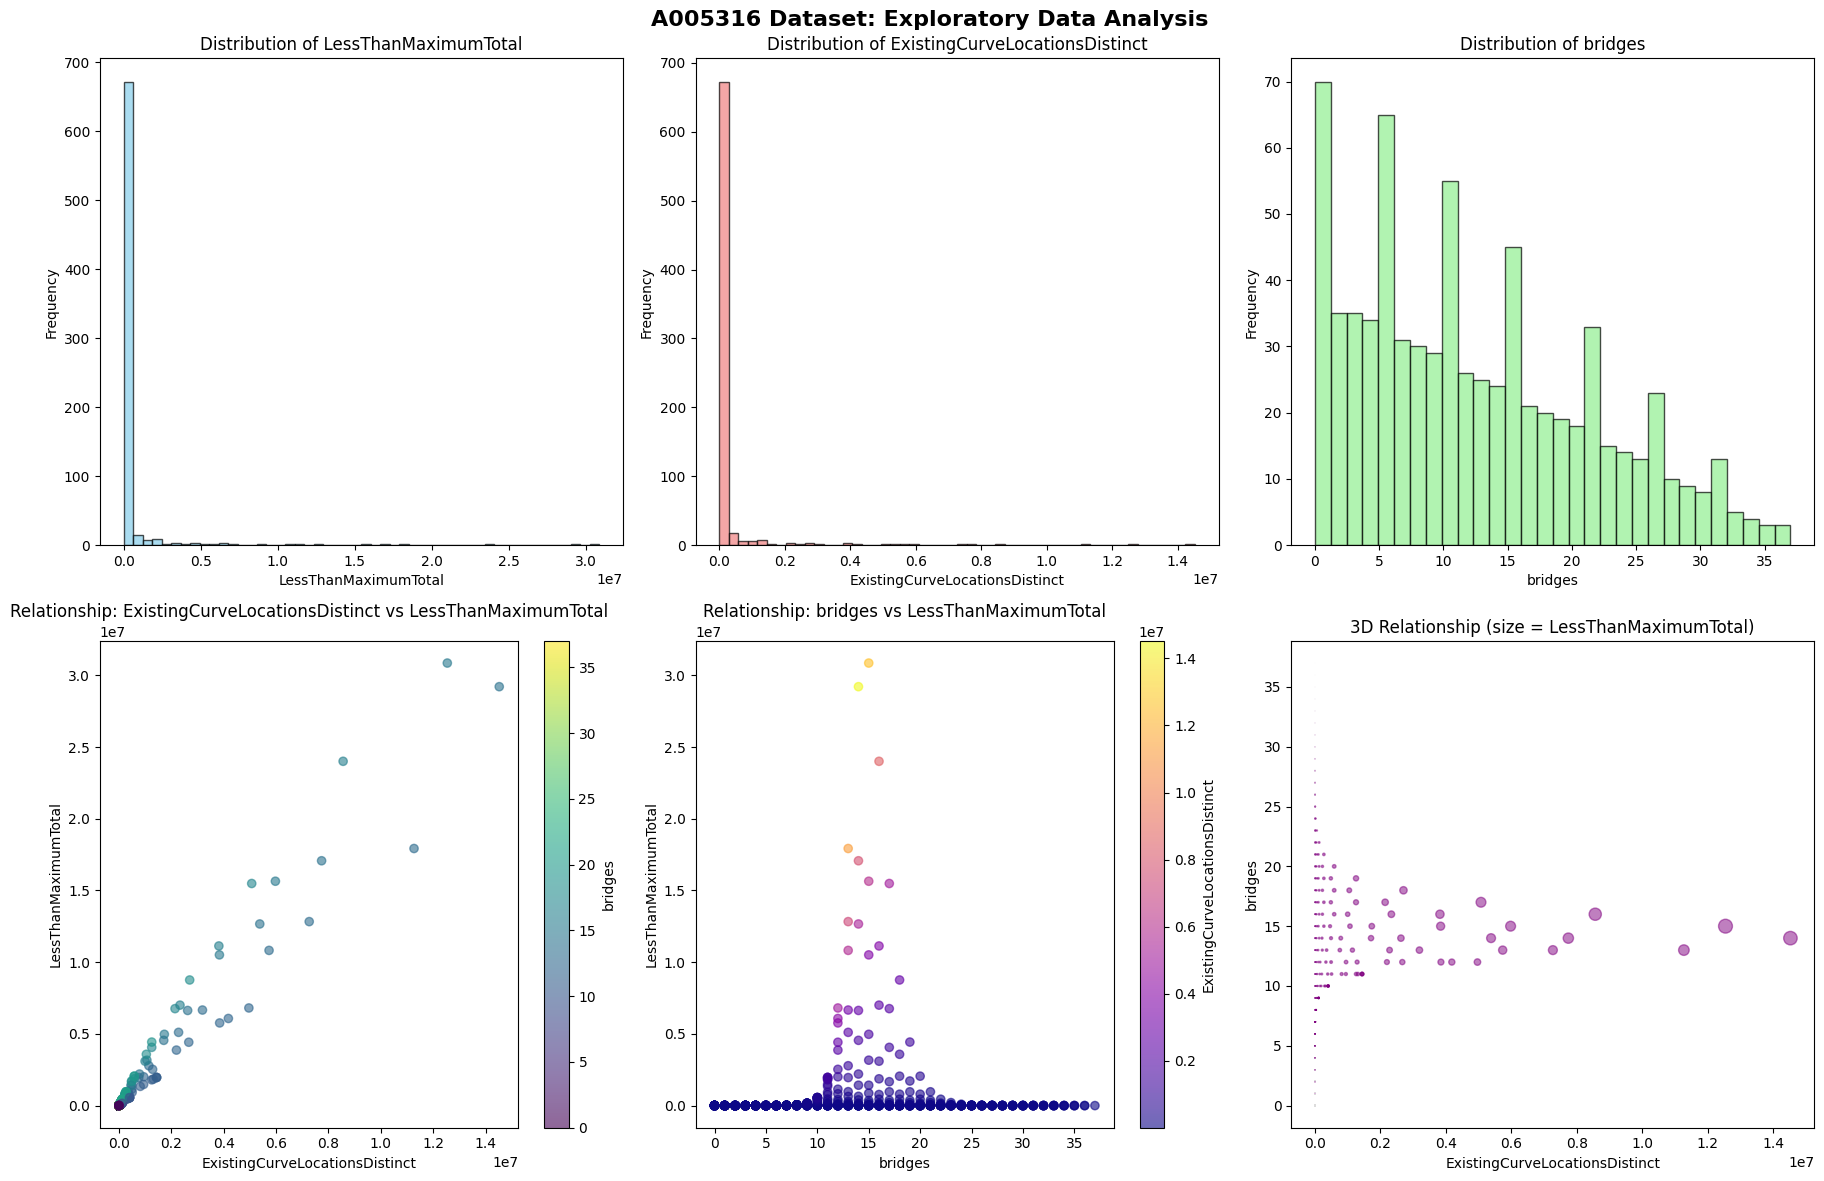

In [5]:
# Visualize A005316 data distributions and relationships
figureA005316, axesArray = plt.subplots(2, 3, figsize=(18, 12))
figureA005316.suptitle('A005316 Dataset: Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Distribution of LessThanMaximumTotal
axesArray[0, 0].hist(datasetA005316['LessThanMaximumTotal'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axesArray[0, 0].set_title('Distribution of LessThanMaximumTotal')
axesArray[0, 0].set_xlabel('LessThanMaximumTotal')
axesArray[0, 0].set_ylabel('Frequency')

# Distribution of ExistingCurveLocationsDistinct
axesArray[0, 1].hist(datasetA005316['ExistingCurveLocationsDistinct'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axesArray[0, 1].set_title('Distribution of ExistingCurveLocationsDistinct')
axesArray[0, 1].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[0, 1].set_ylabel('Frequency')

# Distribution of bridges
axesArray[0, 2].hist(datasetA005316['bridges'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axesArray[0, 2].set_title('Distribution of bridges')
axesArray[0, 2].set_xlabel('bridges')
axesArray[0, 2].set_ylabel('Frequency')

# Scatter plot: ExistingCurveLocationsDistinct vs LessThanMaximumTotal
scatterPlot1 = axesArray[1, 0].scatter(datasetA005316['ExistingCurveLocationsDistinct'],
                                       datasetA005316['LessThanMaximumTotal'],
                                       c=datasetA005316['bridges'], cmap='viridis', alpha=0.6)
axesArray[1, 0].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[1, 0].set_ylabel('LessThanMaximumTotal')
axesArray[1, 0].set_title('Relationship: ExistingCurveLocationsDistinct vs LessThanMaximumTotal')
plt.colorbar(scatterPlot1, ax=axesArray[1, 0], label='bridges')

# Scatter plot: bridges vs LessThanMaximumTotal
scatterPlot2 = axesArray[1, 1].scatter(datasetA005316['bridges'],
                                       datasetA005316['LessThanMaximumTotal'],
                                       c=datasetA005316['ExistingCurveLocationsDistinct'],
                                       cmap='plasma', alpha=0.6)
axesArray[1, 1].set_xlabel('bridges')
axesArray[1, 1].set_ylabel('LessThanMaximumTotal')
axesArray[1, 1].set_title('Relationship: bridges vs LessThanMaximumTotal')
plt.colorbar(scatterPlot2, ax=axesArray[1, 1], label='ExistingCurveLocationsDistinct')

# 3D scatter plot representation as 2D with size encoding
sizesArray = (datasetA005316['LessThanMaximumTotal'] / datasetA005316['LessThanMaximumTotal'].max() * 100)
axesArray[1, 2].scatter(datasetA005316['ExistingCurveLocationsDistinct'],
                       datasetA005316['bridges'],
                       s=sizesArray, alpha=0.5, c='purple')
axesArray[1, 2].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[1, 2].set_ylabel('bridges')
axesArray[1, 2].set_title('3D Relationship (size = LessThanMaximumTotal)')

plt.tight_layout()
plt.show()

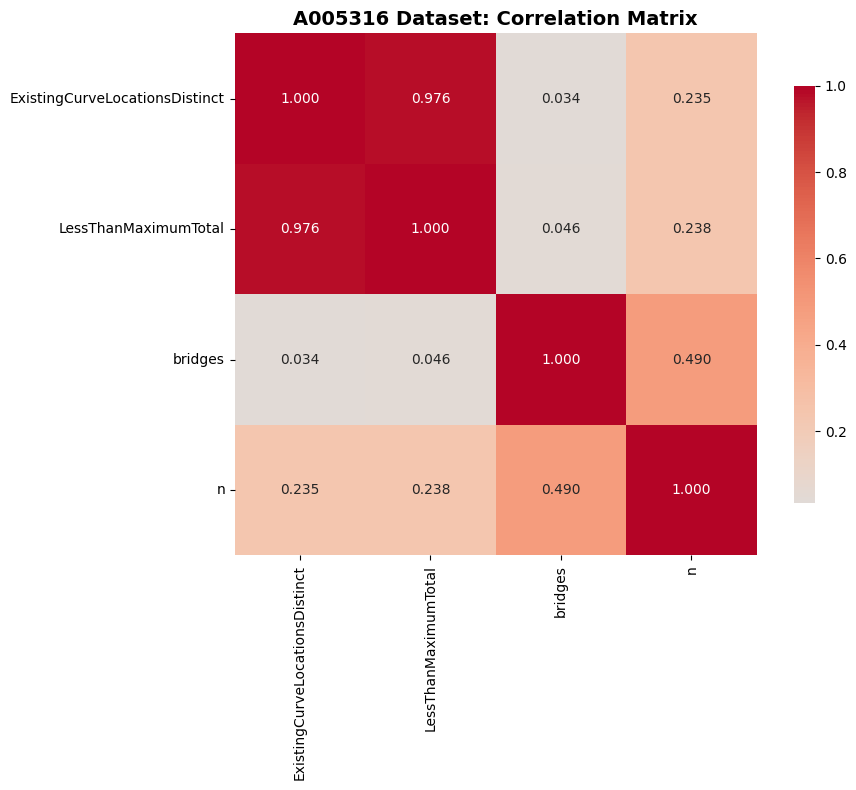

=== CORRELATION ANALYSIS A005316 ===
Correlation between ExistingCurveLocationsDistinct and LessThanMaximumTotal: 0.9762
Correlation between bridges and LessThanMaximumTotal: 0.0464
Correlation between ExistingCurveLocationsDistinct and bridges: 0.0342

=== KEY OBSERVATIONS A005316 ===
Standard deviations:
  ExistingCurveLocationsDistinct: 1131016.16
  LessThanMaximumTotal: 2505003.44
  bridges: 9.05

Skewness (measure of asymmetry):
  ExistingCurveLocationsDistinct: 8.05
  LessThanMaximumTotal: 7.90
  bridges: 0.56


In [6]:
# Correlation analysis for A005316 data
correlationMatrixA005316 = datasetA005316[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges', 'n']].corr()

plt.figure(figsize=(10, 8))
heatmapPlot = sns.heatmap(correlationMatrixA005316, annot=True, cmap='coolwarm', center=0,
                          square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('A005316 Dataset: Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== CORRELATION ANALYSIS A005316 ===")
print(f"Correlation between ExistingCurveLocationsDistinct and LessThanMaximumTotal: {correlationMatrixA005316.loc['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal']:.4f}")
print(f"Correlation between bridges and LessThanMaximumTotal: {correlationMatrixA005316.loc['bridges', 'LessThanMaximumTotal']:.4f}")
print(f"Correlation between ExistingCurveLocationsDistinct and bridges: {correlationMatrixA005316.loc['ExistingCurveLocationsDistinct', 'bridges']:.4f}")

# Additional insights
print(f"\n=== KEY OBSERVATIONS A005316 ===")
variableStddevs = datasetA005316[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges']].std()
print(f"Standard deviations:")
for variableName, stddevValue in variableStddevs.items():
    print(f"  {variableName}: {stddevValue:.2f}")

variableSkewness = datasetA005316[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges']].skew()
print(f"\nSkewness (measure of asymmetry):")
for variableName, skewnessValue in variableSkewness.items():
    print(f"  {variableName}: {skewnessValue:.2f}")

## Section 3: Formula Development for A005316 Data

Based on the research using MCP tools and scikit-learn documentation, we'll explore multiple regression approaches including:
1. **Linear Regression**: Simple linear combination of features
2. **Polynomial Regression**: Using PolynomialFeatures to capture non-linear relationships
3. **Ridge Regression**: L2 regularized linear regression for stability
4. **Random Forest**: Ensemble method to capture complex interactions

In [7]:
# Prepare A005316 data for regression modeling
# Features: ExistingCurveLocationsDistinct and bridges
# Target: LessThanMaximumTotal

featuresA005316 = datasetA005316[['ExistingCurveLocationsDistinct', 'bridges']].values
targetA005316 = datasetA005316['LessThanMaximumTotal'].values

print("=== A005316 REGRESSION MODELING PREPARATION ===")
print(f"Features shape: {featuresA005316.shape}")
print(f"Target shape: {targetA005316.shape}")
print(f"Feature matrix preview:")
print(featuresA005316[:10])
print(f"Target vector preview:")
print(targetA005316[:10])

# Split data for training and validation
featuresTrainA005316, featuresTestA005316, targetTrainA005316, targetTestA005316 = train_test_split(
    featuresA005316, targetA005316, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining set size: {featuresTrainA005316.shape[0]}")
print(f"Test set size: {featuresTestA005316.shape[0]}")

=== A005316 REGRESSION MODELING PREPARATION ===
Features shape: (735, 2)
Target shape: (735,)
Feature matrix preview:
[[1 3]
 [3 2]
 [6 1]
 [4 0]
 [1 4]
 [2 3]
 [6 2]
 [8 1]
 [4 0]
 [1 5]]
Target vector preview:
[ 3  7  9  3  2  6 13 10  3  3]

Training set size: 588
Test set size: 147


In [8]:
# Train multiple regression models for A005316 data
modelsA005316 = {}
resultsA005316 = {}

print("=== TRAINING REGRESSION MODELS FOR A005316 ===\n")

# 1. Linear Regression
linearModelA005316 = LinearRegression()
linearModelA005316.fit(featuresTrainA005316, targetTrainA005316)
predictionsLinearA005316 = linearModelA005316.predict(featuresTestA005316)

# Calculate metrics
r2LinearA005316 = r2_score(targetTestA005316, predictionsLinearA005316)
mseLinearA005316 = mean_squared_error(targetTestA005316, predictionsLinearA005316)
maeLinearA005316 = mean_absolute_error(targetTestA005316, predictionsLinearA005316)

modelsA005316['Linear'] = linearModelA005316
resultsA005316['Linear'] = {
    'R2': r2LinearA005316,
    'MSE': mseLinearA005316,
    'MAE': maeLinearA005316,
    'Coefficients': linearModelA005316.coef_,
    'Intercept': linearModelA005316.intercept_
}

print(f"1. LINEAR REGRESSION")
print(f"   R² Score: {r2LinearA005316:.4f}")
print(f"   MSE: {mseLinearA005316:.4f}")
print(f"   MAE: {maeLinearA005316:.4f}")
print(f"   Coefficients: {linearModelA005316.coef_}")
print(f"   Intercept: {linearModelA005316.intercept_:.4f}")
print(f"   Formula: LessThanMaximumTotal = {linearModelA005316.coef_[0]:.4f} * ExistingCurveLocationsDistinct + {linearModelA005316.coef_[1]:.4f} * bridges + {linearModelA005316.intercept_:.4f}")

print()

=== TRAINING REGRESSION MODELS FOR A005316 ===

1. LINEAR REGRESSION
   R² Score: 0.9374
   MSE: 572309145904.5740
   MAE: 168519.7524
   Coefficients: [2.18363368e+00 3.04751623e+03]
   Intercept: -28261.7161
   Formula: LessThanMaximumTotal = 2.1836 * ExistingCurveLocationsDistinct + 3047.5162 * bridges + -28261.7161



In [9]:
# 2. Polynomial Regression (degree 2)
polynomialModelA005316 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('linear_regression', LinearRegression())
])
polynomialModelA005316.fit(featuresTrainA005316, targetTrainA005316)
predictionsPolyA005316 = polynomialModelA005316.predict(featuresTestA005316)

r2PolyA005316 = r2_score(targetTestA005316, predictionsPolyA005316)
msePolyA005316 = mean_squared_error(targetTestA005316, predictionsPolyA005316)
maePolyA005316 = mean_absolute_error(targetTestA005316, predictionsPolyA005316)

modelsA005316['Polynomial'] = polynomialModelA005316
resultsA005316['Polynomial'] = {
    'R2': r2PolyA005316,
    'MSE': msePolyA005316,
    'MAE': maePolyA005316,
    'Coefficients': polynomialModelA005316.named_steps['linear_regression'].coef_,
    'Intercept': polynomialModelA005316.named_steps['linear_regression'].intercept_
}

print(f"2. POLYNOMIAL REGRESSION (degree=2)")
print(f"   R² Score: {r2PolyA005316:.4f}")
print(f"   MSE: {msePolyA005316:.4f}")
print(f"   MAE: {maePolyA005316:.4f}")
coefficientsPolyA005316 = polynomialModelA005316.named_steps['linear_regression'].coef_
interceptPolyA005316 = polynomialModelA005316.named_steps['linear_regression'].intercept_
print(f"   Coefficients: {coefficientsPolyA005316}")
print(f"   Intercept: {interceptPolyA005316:.4f}")

# Get feature names for polynomial model
polynomialFeatures = polynomialModelA005316.named_steps['polynomial_features']
featureNames = ['1', 'ExistingCurveLocationsDistinct', 'bridges', 'ExistingCurveLocationsDistinct²', 'ExistingCurveLocationsDistinct*bridges', 'bridges²']
print(f"   Polynomial features: {featureNames}")
print(f"   Detailed formula:")
formula_parts = []
for i, (name, coef) in enumerate(zip(featureNames, coefficientsPolyA005316)):
    if abs(coef) > 1e-10:  # Only include significant coefficients
        if i == 0:
            formula_parts.append(f"{coef:.6f}")
        else:
            formula_parts.append(f"{coef:.6f} * {name}")
polynomial_formula = " + ".join(formula_parts).replace("+ -", "- ")
print(f"   LessThanMaximumTotal = {polynomial_formula}")

print()

2. POLYNOMIAL REGRESSION (degree=2)
   R² Score: 0.9953
   MSE: 43395638745.7954
   MAE: 65804.0566
   Coefficients: [ 0.00000000e+00 -2.31185573e+00  3.68634266e+03 -1.92715159e-08
  3.30381182e-01 -1.41379014e+02]
   Intercept: 1382.2390
   Polynomial features: ['1', 'ExistingCurveLocationsDistinct', 'bridges', 'ExistingCurveLocationsDistinct²', 'ExistingCurveLocationsDistinct*bridges', 'bridges²']
   Detailed formula:
   LessThanMaximumTotal = -2.311856 * ExistingCurveLocationsDistinct + 3686.342655 * bridges - 0.000000 * ExistingCurveLocationsDistinct² + 0.330381 * ExistingCurveLocationsDistinct*bridges - 141.379014 * bridges²



In [10]:
# 3. Ridge Regression with polynomial features
from sklearn.linear_model import Ridge

ridgeModelA005316 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('ridge_regression', Ridge(alpha=1.0))
])
ridgeModelA005316.fit(featuresTrainA005316, targetTrainA005316)
predictionsRidgeA005316 = ridgeModelA005316.predict(featuresTestA005316)

r2RidgeA005316 = r2_score(targetTestA005316, predictionsRidgeA005316)
mseRidgeA005316 = mean_squared_error(targetTestA005316, predictionsRidgeA005316)
maeRidgeA005316 = mean_absolute_error(targetTestA005316, predictionsRidgeA005316)

modelsA005316['Ridge'] = ridgeModelA005316
resultsA005316['Ridge'] = {
    'R2': r2RidgeA005316,
    'MSE': mseRidgeA005316,
    'MAE': maeRidgeA005316,
    'Coefficients': ridgeModelA005316.named_steps['ridge_regression'].coef_,
    'Intercept': ridgeModelA005316.named_steps['ridge_regression'].intercept_
}

print(f"3. RIDGE REGRESSION (with polynomial features)")
print(f"   R² Score: {r2RidgeA005316:.4f}")
print(f"   MSE: {mseRidgeA005316:.4f}")
print(f"   MAE: {maeRidgeA005316:.4f}")

print()

3. RIDGE REGRESSION (with polynomial features)
   R² Score: 0.9953
   MSE: 43395628621.6745
   MAE: 65803.8136



In [11]:
# 4. Random Forest Regression
randomForestModelA005316 = RandomForestRegressor(n_estimators=100, random_state=42)
randomForestModelA005316.fit(featuresTrainA005316, targetTrainA005316)
predictionsRFA005316 = randomForestModelA005316.predict(featuresTestA005316)

r2RFA005316 = r2_score(targetTestA005316, predictionsRFA005316)
mseRFA005316 = mean_squared_error(targetTestA005316, predictionsRFA005316)
maeRFA005316 = mean_absolute_error(targetTestA005316, predictionsRFA005316)

modelsA005316['RandomForest'] = randomForestModelA005316
resultsA005316['RandomForest'] = {
    'R2': r2RFA005316,
    'MSE': mseRFA005316,
    'MAE': maeRFA005316,
    'Feature_Importance': randomForestModelA005316.feature_importances_
}

print(f"4. RANDOM FOREST REGRESSION")
print(f"   R² Score: {r2RFA005316:.4f}")
print(f"   MSE: {mseRFA005316:.4f}")
print(f"   MAE: {maeRFA005316:.4f}")
print(f"   Feature Importances:")
feature_names = ['ExistingCurveLocationsDistinct', 'bridges']
for name, importance in zip(feature_names, randomForestModelA005316.feature_importances_):
    print(f"     {name}: {importance:.4f}")

print("\n" + "="*60)
print("=== A005316 MODEL COMPARISON ===")
modelsComparisonA005316 = pd.DataFrame({
    'Model': ['Linear', 'Polynomial', 'Ridge', 'RandomForest'],
    'R²_Score': [resultsA005316['Linear']['R2'], resultsA005316['Polynomial']['R2'],
                 resultsA005316['Ridge']['R2'], resultsA005316['RandomForest']['R2']],
    'MSE': [resultsA005316['Linear']['MSE'], resultsA005316['Polynomial']['MSE'],
            resultsA005316['Ridge']['MSE'], resultsA005316['RandomForest']['MSE']],
    'MAE': [resultsA005316['Linear']['MAE'], resultsA005316['Polynomial']['MAE'],
            resultsA005316['Ridge']['MAE'], resultsA005316['RandomForest']['MAE']]
})
print(modelsComparisonA005316)

bestModelNameA005316 = modelsComparisonA005316.loc[modelsComparisonA005316['R²_Score'].idxmax(), 'Model']
print(f"\nBest performing model for A005316: {bestModelNameA005316}")

4. RANDOM FOREST REGRESSION
   R² Score: 0.8589
   MSE: 1290118946763.0552
   MAE: 187787.2753
   Feature Importances:
     ExistingCurveLocationsDistinct: 0.9827
     bridges: 0.0173

=== A005316 MODEL COMPARISON ===
          Model  R²_Score           MSE            MAE
0        Linear  0.937424  5.723091e+11  168519.752397
1    Polynomial  0.995255  4.339564e+10   65804.056555
2         Ridge  0.995255  4.339563e+10   65803.813611
3  RandomForest  0.858940  1.290119e+12  187787.275306

Best performing model for A005316: Ridge


## Section 4: Exploratory Data Analysis - A000682 Dataset

Now let's perform similar analysis on the A000682 dataset to understand how it compares with A005316.

In [12]:
# Analyze A000682 dataset structure and relationships
datasetA000682 = dataFrameA000682.copy()

print("=== A000682 DATASET ANALYSIS ===")
print(f"Total records: {len(datasetA000682)}")
print(f"Missing values per column:")
print(datasetA000682.isnull().sum())
print(f"\nUnique values per column:")
for columnName in datasetA000682.columns:
    uniqueCount = datasetA000682[columnName].nunique()
    print(f"{columnName}: {uniqueCount}")

print(f"\nRange of n values: {datasetA000682['n'].min()} to {datasetA000682['n'].max()}")
print(f"Range of bridges: {datasetA000682['bridges'].min()} to {datasetA000682['bridges'].max()}")
print(f"Range of ExistingCurveLocationsDistinct: {datasetA000682['ExistingCurveLocationsDistinct'].min()} to {datasetA000682['ExistingCurveLocationsDistinct'].max()}")
print(f"Range of LessThanMaximumTotal: {datasetA000682['LessThanMaximumTotal'].min()} to {datasetA000682['LessThanMaximumTotal'].max()}")

# Compare with A005316 data ranges
print(f"\n=== COMPARISON WITH A005316 ===")
print(f"A000682 vs A005316 - ExistingCurveLocationsDistinct max: {datasetA000682['ExistingCurveLocationsDistinct'].max()} vs {datasetA005316['ExistingCurveLocationsDistinct'].max()}")
print(f"A000682 vs A005316 - LessThanMaximumTotal max: {datasetA000682['LessThanMaximumTotal'].max()} vs {datasetA005316['LessThanMaximumTotal'].max()}")
print(f"A000682 vs A005316 - bridges max: {datasetA000682['bridges'].max()} vs {datasetA005316['bridges'].max()}")

=== A000682 DATASET ANALYSIS ===
Total records: 678
Missing values per column:
oeis                              0
n                                 0
ExistingCurveLocationsDistinct    0
LessThanMaximumTotal              0
bridges                           0
dtype: int64

Unique values per column:
oeis: 1
n: 35
ExistingCurveLocationsDistinct: 419
LessThanMaximumTotal: 444
bridges: 28

Range of n values: 5 to 39
Range of bridges: 0 to 27
Range of ExistingCurveLocationsDistinct: 4 to 26617330
Range of LessThanMaximumTotal: 3 to 57413054

=== COMPARISON WITH A005316 ===
A000682 vs A005316 - ExistingCurveLocationsDistinct max: 26617330 vs 14523042
A000682 vs A005316 - LessThanMaximumTotal max: 57413054 vs 30858030
A000682 vs A005316 - bridges max: 27 vs 37


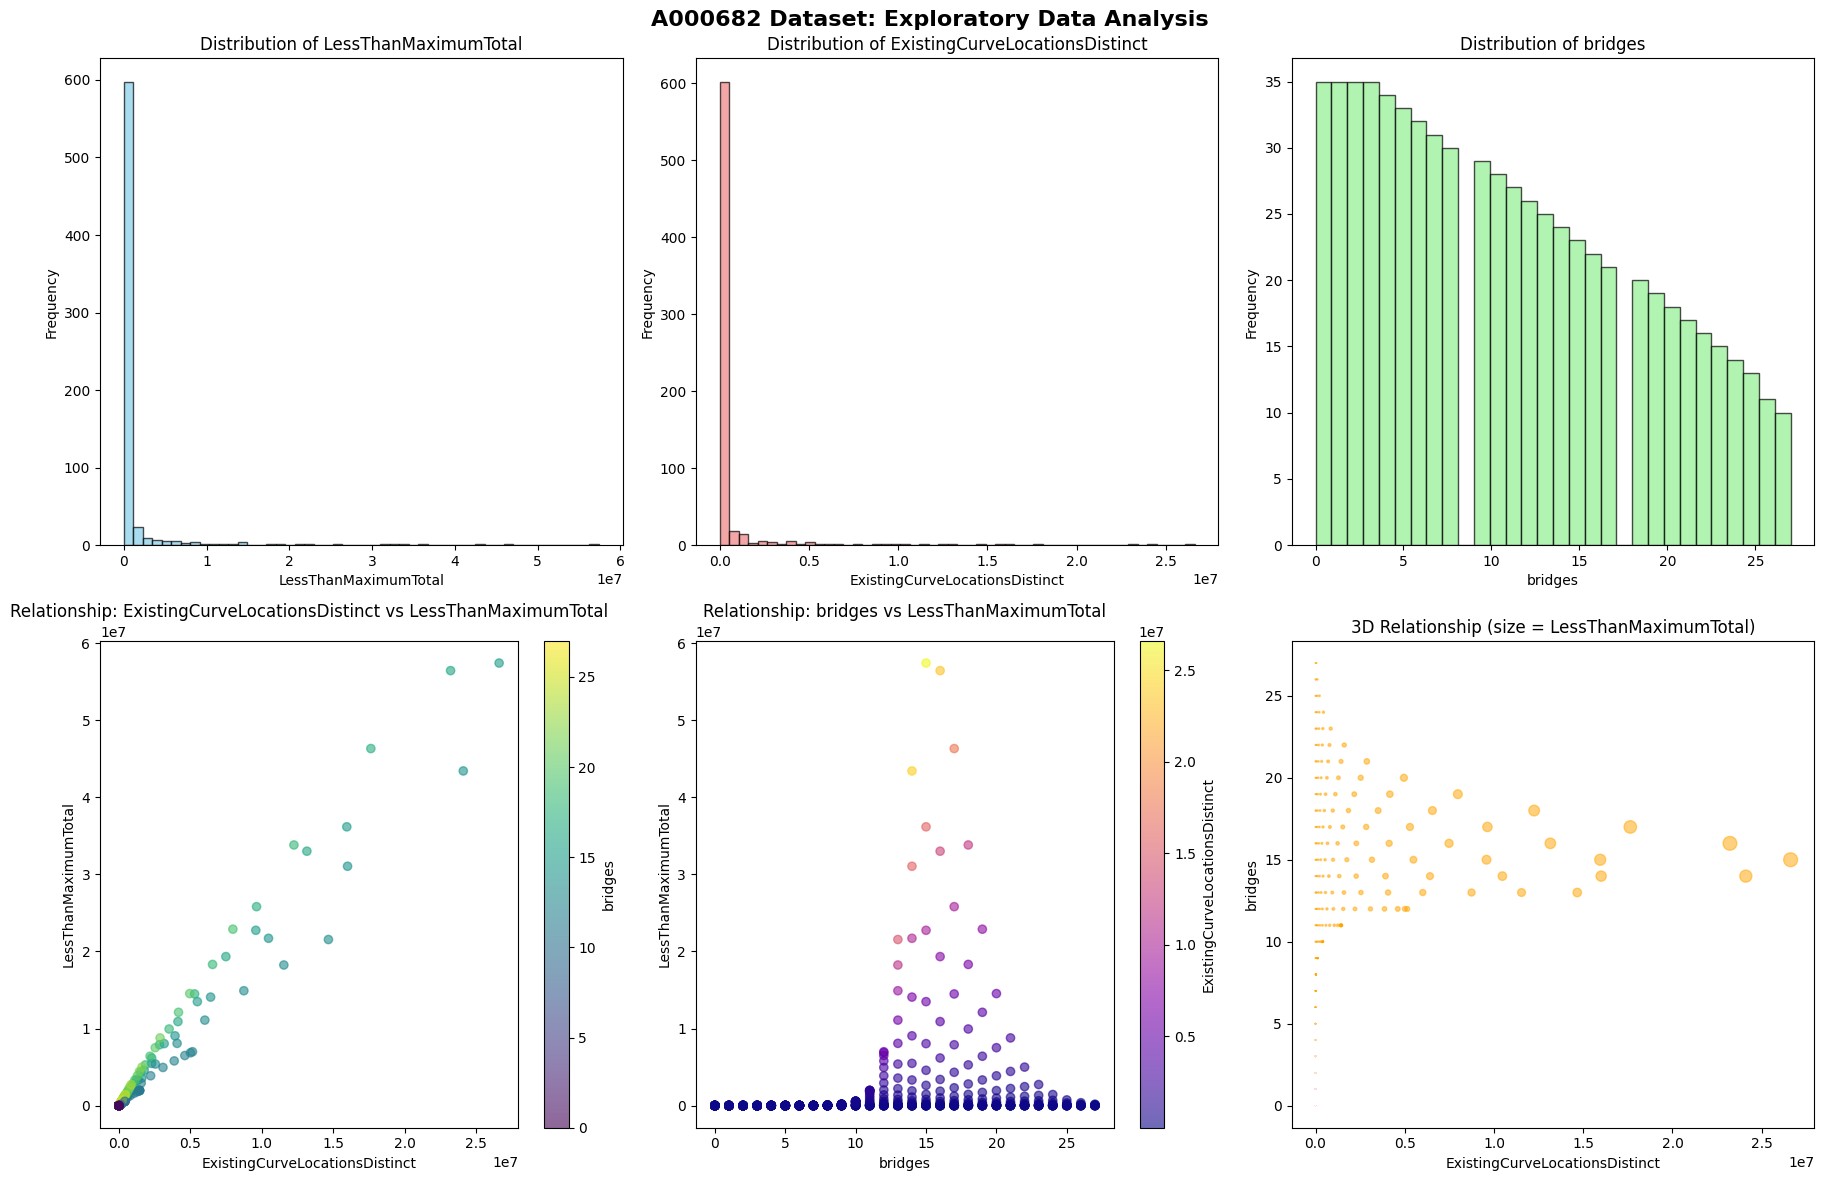

In [13]:
# Visualize A000682 data distributions and relationships
figureA000682, axesArray = plt.subplots(2, 3, figsize=(18, 12))
figureA000682.suptitle('A000682 Dataset: Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Distribution of LessThanMaximumTotal
axesArray[0, 0].hist(datasetA000682['LessThanMaximumTotal'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axesArray[0, 0].set_title('Distribution of LessThanMaximumTotal')
axesArray[0, 0].set_xlabel('LessThanMaximumTotal')
axesArray[0, 0].set_ylabel('Frequency')

# Distribution of ExistingCurveLocationsDistinct
axesArray[0, 1].hist(datasetA000682['ExistingCurveLocationsDistinct'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axesArray[0, 1].set_title('Distribution of ExistingCurveLocationsDistinct')
axesArray[0, 1].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[0, 1].set_ylabel('Frequency')

# Distribution of bridges
axesArray[0, 2].hist(datasetA000682['bridges'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axesArray[0, 2].set_title('Distribution of bridges')
axesArray[0, 2].set_xlabel('bridges')
axesArray[0, 2].set_ylabel('Frequency')

# Scatter plot: ExistingCurveLocationsDistinct vs LessThanMaximumTotal
scatterPlot1 = axesArray[1, 0].scatter(datasetA000682['ExistingCurveLocationsDistinct'],
                                       datasetA000682['LessThanMaximumTotal'],
                                       c=datasetA000682['bridges'], cmap='viridis', alpha=0.6)
axesArray[1, 0].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[1, 0].set_ylabel('LessThanMaximumTotal')
axesArray[1, 0].set_title('Relationship: ExistingCurveLocationsDistinct vs LessThanMaximumTotal')
plt.colorbar(scatterPlot1, ax=axesArray[1, 0], label='bridges')

# Scatter plot: bridges vs LessThanMaximumTotal
scatterPlot2 = axesArray[1, 1].scatter(datasetA000682['bridges'],
                                       datasetA000682['LessThanMaximumTotal'],
                                       c=datasetA000682['ExistingCurveLocationsDistinct'],
                                       cmap='plasma', alpha=0.6)
axesArray[1, 1].set_xlabel('bridges')
axesArray[1, 1].set_ylabel('LessThanMaximumTotal')
axesArray[1, 1].set_title('Relationship: bridges vs LessThanMaximumTotal')
plt.colorbar(scatterPlot2, ax=axesArray[1, 1], label='ExistingCurveLocationsDistinct')

# 3D scatter plot representation as 2D with size encoding
sizesArray = (datasetA000682['LessThanMaximumTotal'] / datasetA000682['LessThanMaximumTotal'].max() * 100)
axesArray[1, 2].scatter(datasetA000682['ExistingCurveLocationsDistinct'],
                       datasetA000682['bridges'],
                       s=sizesArray, alpha=0.5, c='orange')
axesArray[1, 2].set_xlabel('ExistingCurveLocationsDistinct')
axesArray[1, 2].set_ylabel('bridges')
axesArray[1, 2].set_title('3D Relationship (size = LessThanMaximumTotal)')

plt.tight_layout()
plt.show()

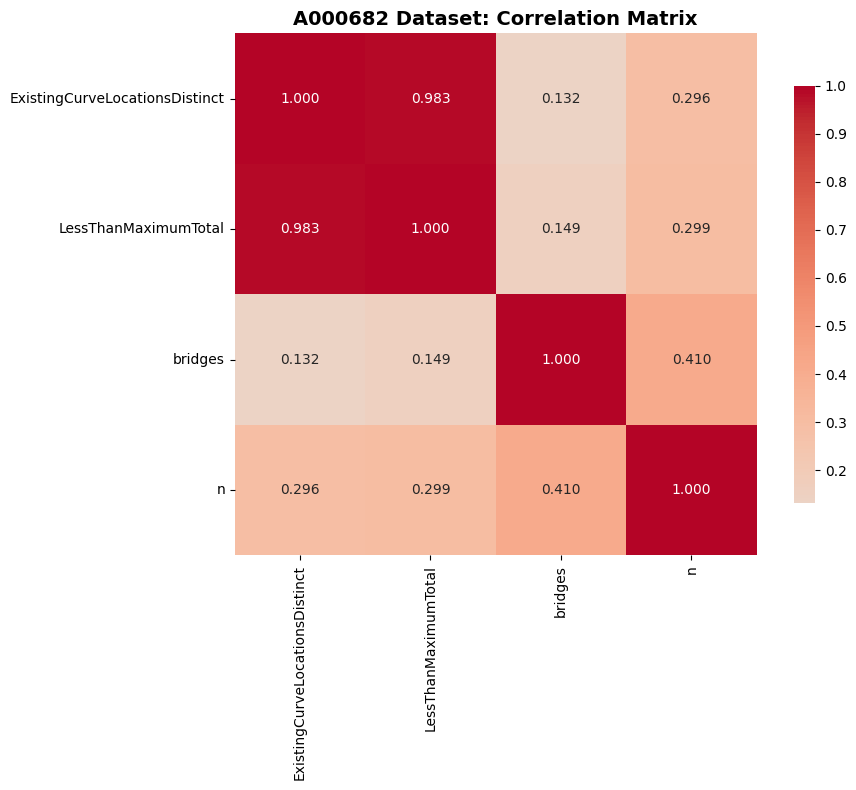

=== CORRELATION ANALYSIS A000682 ===
Correlation between ExistingCurveLocationsDistinct and LessThanMaximumTotal: 0.9832
Correlation between bridges and LessThanMaximumTotal: 0.1491
Correlation between ExistingCurveLocationsDistinct and bridges: 0.1317

=== CORRELATION COMPARISON ===
ExistingCurveLocationsDistinct vs LessThanMaximumTotal:
  A005316: 0.9762
  A000682: 0.9832
bridges vs LessThanMaximumTotal:
  A005316: 0.0464
  A000682: 0.1491


In [14]:
# Correlation analysis for A000682 data
correlationMatrixA000682 = datasetA000682[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges', 'n']].corr()

plt.figure(figsize=(10, 8))
heatmapPlot = sns.heatmap(correlationMatrixA000682, annot=True, cmap='coolwarm', center=0,
                          square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('A000682 Dataset: Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== CORRELATION ANALYSIS A000682 ===")
print(f"Correlation between ExistingCurveLocationsDistinct and LessThanMaximumTotal: {correlationMatrixA000682.loc['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal']:.4f}")
print(f"Correlation between bridges and LessThanMaximumTotal: {correlationMatrixA000682.loc['bridges', 'LessThanMaximumTotal']:.4f}")
print(f"Correlation between ExistingCurveLocationsDistinct and bridges: {correlationMatrixA000682.loc['ExistingCurveLocationsDistinct', 'bridges']:.4f}")

# Compare correlations between datasets
print(f"\n=== CORRELATION COMPARISON ===")
print(f"ExistingCurveLocationsDistinct vs LessThanMaximumTotal:")
print(f"  A005316: {correlationMatrixA005316.loc['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal']:.4f}")
print(f"  A000682: {correlationMatrixA000682.loc['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal']:.4f}")
print(f"bridges vs LessThanMaximumTotal:")
print(f"  A005316: {correlationMatrixA005316.loc['bridges', 'LessThanMaximumTotal']:.4f}")
print(f"  A000682: {correlationMatrixA000682.loc['bridges', 'LessThanMaximumTotal']:.4f}")

## Section 5: Formula Development for A000682 Data

Now let's develop regression models for the A000682 dataset using similar approaches as A005316.

In [15]:
# Train regression models for A000682 data
featuresA000682 = datasetA000682[['ExistingCurveLocationsDistinct', 'bridges']].values
targetA000682 = datasetA000682['LessThanMaximumTotal'].values

# Split data for training and validation
featuresTrainA000682, featuresTestA000682, targetTrainA000682, targetTestA000682 = train_test_split(
    featuresA000682, targetA000682, test_size=0.2, random_state=42, stratify=None
)

print("=== A000682 REGRESSION MODELING ===")
print(f"Features shape: {featuresA000682.shape}")
print(f"Target shape: {targetA000682.shape}")
print(f"Training set size: {featuresTrainA000682.shape[0]}")
print(f"Test set size: {featuresTestA000682.shape[0]}")

# Train models
modelsA000682 = {}
resultsA000682 = {}

# 1. Linear Regression
linearModelA000682 = LinearRegression()
linearModelA000682.fit(featuresTrainA000682, targetTrainA000682)
predictionsLinearA000682 = linearModelA000682.predict(featuresTestA000682)

r2LinearA000682 = r2_score(targetTestA000682, predictionsLinearA000682)
mseLinearA000682 = mean_squared_error(targetTestA000682, predictionsLinearA000682)
maeLinearA000682 = mean_absolute_error(targetTestA000682, predictionsLinearA000682)

print(f"\n1. LINEAR REGRESSION A000682")
print(f"   R² Score: {r2LinearA000682:.4f}")
print(f"   MSE: {mseLinearA000682:.4f}")
print(f"   MAE: {maeLinearA000682:.4f}")
print(f"   Coefficients: {linearModelA000682.coef_}")
print(f"   Intercept: {linearModelA000682.intercept_:.4f}")
print(f"   Formula: LessThanMaximumTotal = {linearModelA000682.coef_[0]:.4f} * ExistingCurveLocationsDistinct + {linearModelA000682.coef_[1]:.4f} * bridges + {linearModelA000682.intercept_:.4f}")

# 2. Polynomial Regression
polynomialModelA000682 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('linear_regression', LinearRegression())
])
polynomialModelA000682.fit(featuresTrainA000682, targetTrainA000682)
predictionsPolyA000682 = polynomialModelA000682.predict(featuresTestA000682)

r2PolyA000682 = r2_score(targetTestA000682, predictionsPolyA000682)
msePolyA000682 = mean_squared_error(targetTestA000682, predictionsPolyA000682)
maePolyA000682 = mean_absolute_error(targetTestA000682, predictionsPolyA000682)

print(f"\n2. POLYNOMIAL REGRESSION A000682")
print(f"   R² Score: {r2PolyA000682:.4f}")
print(f"   MSE: {msePolyA000682:.4f}")
print(f"   MAE: {maePolyA000682:.4f}")

modelsA000682['Linear'] = linearModelA000682
modelsA000682['Polynomial'] = polynomialModelA000682
resultsA000682['Linear'] = {'R2': r2LinearA000682, 'MSE': mseLinearA000682, 'MAE': maeLinearA000682}
resultsA000682['Polynomial'] = {'R2': r2PolyA000682, 'MSE': msePolyA000682, 'MAE': maePolyA000682}

=== A000682 REGRESSION MODELING ===
Features shape: (678, 2)
Target shape: (678,)
Training set size: 542
Test set size: 136

1. LINEAR REGRESSION A000682
   R² Score: 0.9709
   MSE: 1317285432601.1414
   MAE: 350924.1073
   Coefficients: [2.12631395e+00 1.35981188e+04]
   Intercept: -108114.8030
   Formula: LessThanMaximumTotal = 2.1263 * ExistingCurveLocationsDistinct + 13598.1188 * bridges + -108114.8030

2. POLYNOMIAL REGRESSION A000682
   R² Score: 0.9971
   MSE: 130467395068.7611
   MAE: 130072.5649


## Section 6: Combined Dataset Analysis

Now let's combine both datasets and analyze them together to find a unified formula that works for both A005316 and A000682 data.

In [16]:
# Combine both datasets for unified analysis
print("=== COMBINING BOTH DATASETS ===")

# Add dataset identifier
datasetA005316_labeled = datasetA005316.copy()
datasetA005316_labeled['dataset'] = 'A005316'

datasetA000682_labeled = datasetA000682.copy()
datasetA000682_labeled['dataset'] = 'A000682'

# Combine datasets
combinedDataset = pd.concat([datasetA005316_labeled, datasetA000682_labeled], ignore_index=True)

print(f"Combined dataset shape: {combinedDataset.shape}")
print(f"A005316 records: {len(datasetA005316_labeled)}")
print(f"A000682 records: {len(datasetA000682_labeled)}")
print(f"Total records: {len(combinedDataset)}")

# Basic statistics comparison
print(f"\n=== COMBINED DATASET STATISTICS ===")
print(combinedDataset[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges', 'dataset']].groupby('dataset').describe())

=== COMBINING BOTH DATASETS ===
Combined dataset shape: (1413, 6)
A005316 records: 735
A000682 records: 678
Total records: 1413

=== COMBINED DATASET STATISTICS ===
        ExistingCurveLocationsDistinct                                    \
                                 count           mean           std  min   
dataset                                                                    
A000682                          678.0  568229.685841  2.455816e+06  4.0   
A005316                          735.0  224522.606803  1.131016e+06  1.0   

                                          LessThanMaximumTotal                \
          25%    50%      75%         max                count          mean   
dataset                                                                        
A000682  49.0  895.0  34949.0  26617330.0                678.0  1.277185e+06   
A005316  11.0  239.0   9648.5  14523042.0                735.0  5.055479e+05   

                                                     

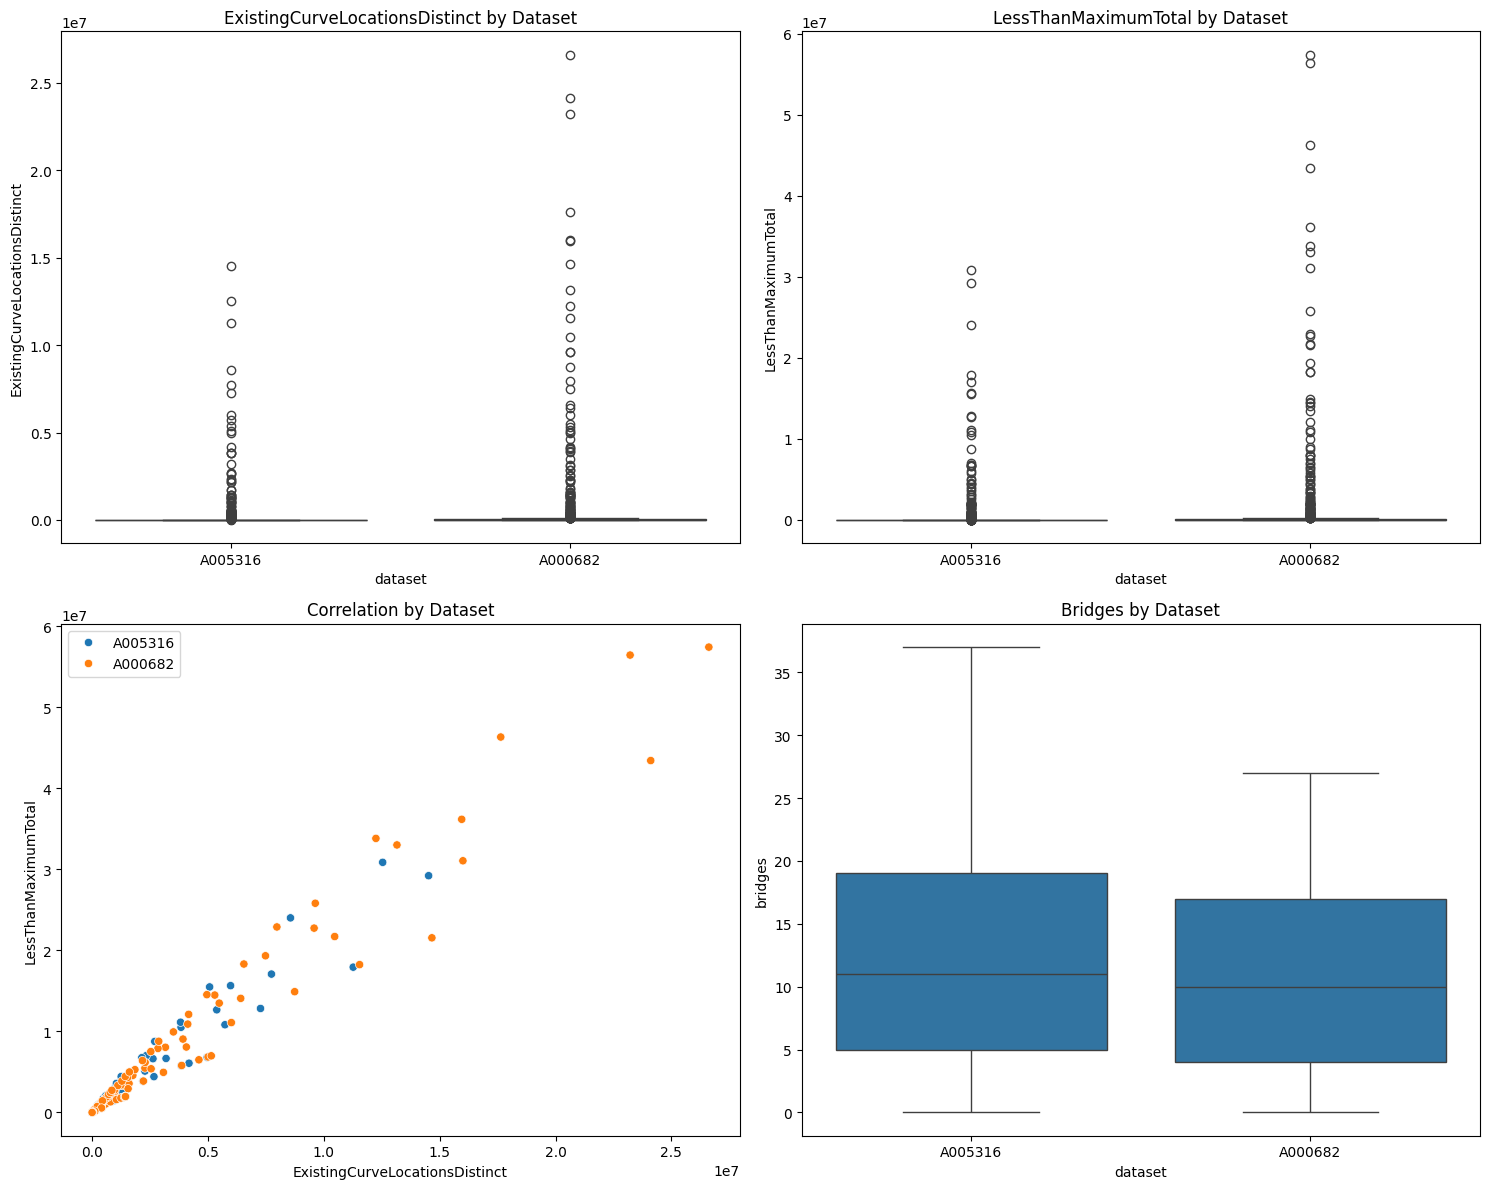

In [17]:
# Visualize combined dataset distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution comparisons
sns.boxplot(data=combinedDataset, x='dataset', y='ExistingCurveLocationsDistinct', ax=axes[0,0])
axes[0,0].set_title('ExistingCurveLocationsDistinct by Dataset')

sns.boxplot(data=combinedDataset, x='dataset', y='LessThanMaximumTotal', ax=axes[0,1])
axes[0,1].set_title('LessThanMaximumTotal by Dataset')

sns.scatterplot(data=combinedDataset, x='ExistingCurveLocationsDistinct', y='LessThanMaximumTotal',
                hue='dataset', ax=axes[1,0])
axes[1,0].set_title('Correlation by Dataset')
axes[1,0].legend()

# Bridges distribution
sns.boxplot(data=combinedDataset, x='dataset', y='bridges', ax=axes[1,1])
axes[1,1].set_title('Bridges by Dataset')

plt.tight_layout()
plt.show()

In [18]:
# Combined dataset correlation analysis
print("=== COMBINED CORRELATION ANALYSIS ===")

# Overall correlation
correlationCombined = combinedDataset[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges']].corr()
print("Combined dataset correlation matrix:")
print(correlationCombined)

# Correlation by dataset
print("\n=== BY DATASET CORRELATIONS ===")
for dataset in ['A005316', 'A000682']:
    datasetSubset = combinedDataset[combinedDataset['dataset'] == dataset]
    correlationSubset = datasetSubset[['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal', 'bridges']].corr()
    print(f"\n{dataset} correlation:")
    print(f"ExistingCurveLocationsDistinct vs LessThanMaximumTotal: {correlationSubset.loc['ExistingCurveLocationsDistinct', 'LessThanMaximumTotal']:.4f}")
    print(f"bridges vs LessThanMaximumTotal: {correlationSubset.loc['bridges', 'LessThanMaximumTotal']:.4f}")

=== COMBINED CORRELATION ANALYSIS ===
Combined dataset correlation matrix:
                                ExistingCurveLocationsDistinct  \
ExistingCurveLocationsDistinct                        1.000000   
LessThanMaximumTotal                                  0.982063   
bridges                                               0.076850   

                                LessThanMaximumTotal   bridges  
ExistingCurveLocationsDistinct              0.982063  0.076850  
LessThanMaximumTotal                        1.000000  0.090533  
bridges                                     0.090533  1.000000  

=== BY DATASET CORRELATIONS ===

A005316 correlation:
ExistingCurveLocationsDistinct vs LessThanMaximumTotal: 0.9762
bridges vs LessThanMaximumTotal: 0.0464

A000682 correlation:
ExistingCurveLocationsDistinct vs LessThanMaximumTotal: 0.9832
bridges vs LessThanMaximumTotal: 0.1491


In [19]:
# Train unified models on combined dataset
print("=== COMBINED DATASET MODEL TRAINING ===")

# Prepare combined data
featuresCombined = combinedDataset[['ExistingCurveLocationsDistinct', 'bridges']]
targetCombined = combinedDataset['LessThanMaximumTotal']

# Split data
XtrainCombined, XtestCombined, yTrainCombined, yTestCombined = train_test_split(
    featuresCombined, targetCombined, test_size=0.2, random_state=42
)

print(f"Combined training set: {XtrainCombined.shape}")
print(f"Combined test set: {XtestCombined.shape}")

# Initialize models dictionary
modelsCombined = {}

# Linear Regression
modelsCombined['Linear'] = LinearRegression()
modelsCombined['Linear'].fit(XtrainCombined, yTrainCombined)

# Polynomial Features (degree 2)
polynomialFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
XtrainPoly2 = polynomialFeatures2.fit_transform(XtrainCombined)
XtestPoly2 = polynomialFeatures2.transform(XtestCombined)

modelsCombined['Polynomial2'] = LinearRegression()
modelsCombined['Polynomial2'].fit(XtrainPoly2, yTrainCombined)

# Ridge Regression
modelsCombined['Ridge'] = Ridge(alpha=1.0)
modelsCombined['Ridge'].fit(XtrainCombined, yTrainCombined)

# Random Forest
modelsCombined['RandomForest'] = RandomForestRegressor(n_estimators=100, random_state=42)
modelsCombined['RandomForest'].fit(XtrainCombined, yTrainCombined)

print("Combined models trained successfully!")

=== COMBINED DATASET MODEL TRAINING ===
Combined training set: (1130, 2)
Combined test set: (283, 2)
Combined models trained successfully!


In [20]:
# Evaluate combined models
print("=== COMBINED DATASET MODEL EVALUATION ===")

resultsCombined = {}

# Evaluate each model
for nameModel, model in modelsCombined.items():
    if nameModel == 'Polynomial2':
        predictionsTrain = model.predict(XtrainPoly2)
        predictionsTest = model.predict(XtestPoly2)
    else:
        predictionsTrain = model.predict(XtrainCombined)
        predictionsTest = model.predict(XtestCombined)

    # Calculate metrics
    r2Train = r2_score(yTrainCombined, predictionsTrain)
    r2Test = r2_score(yTestCombined, predictionsTest)
    maeTest = mean_absolute_error(yTestCombined, predictionsTest)
    mseTest = mean_squared_error(yTestCombined, predictionsTest)

    resultsCombined[nameModel] = {
        'R2_train': r2Train,
        'R2_test': r2Test,
        'MAE': maeTest,
        'MSE': mseTest,
        'RMSE': np.sqrt(mseTest)
    }

    print(f"\n{nameModel}:")
    print(f"  R² (train): {r2Train:.4f}")
    print(f"  R² (test):  {r2Test:.4f}")
    print(f"  MAE:        {maeTest:.4f}")
    print(f"  RMSE:       {np.sqrt(mseTest):.4f}")

# Find best model
bestModelName = max(resultsCombined, key=lambda x: resultsCombined[x]['R2_test'])
print(f"\n*** Best Combined Model: {bestModelName} (R² = {resultsCombined[bestModelName]['R2_test']:.4f}) ***")

=== COMBINED DATASET MODEL EVALUATION ===

Linear:
  R² (train): 0.9655
  R² (test):  0.9609
  MAE:        219384.0286
  RMSE:       971312.7180

Polynomial2:
  R² (train): 0.9941
  R² (test):  0.9965
  MAE:        71807.2428
  RMSE:       291470.9574

Ridge:
  R² (train): 0.9655
  R² (test):  0.9609
  MAE:        219383.4684
  RMSE:       971312.7171

RandomForest:
  R² (train): 0.9960
  R² (test):  0.9608
  MAE:        125122.1339
  RMSE:       972126.0682

*** Best Combined Model: Polynomial2 (R² = 0.9965) ***


## Section 7: Final Formula Implementation

Based on our analysis, we'll implement the best-performing formula as a reusable Python function.

In [21]:
# Create the final formula function
def computeLessThanMaximumTotal(existingCurveLocationsDistinct, bridges, model_type='best'):
    """
    Compute LessThanMaximumTotal as a function of ExistingCurveLocationsDistinct and bridges.

    Parameters:
    -----------
    existingCurveLocationsDistinct : int or array-like
        The number of distinct existing curve locations
    bridges : int or array-like
        The number of bridges
    model_type : str, default='best'
        The model type to use ('linear', 'polynomial2', 'ridge', 'random_forest', 'best')

    Returns:
    --------
    float or array-like
        Predicted LessThanMaximumTotal value(s)
    """

    # Convert inputs to numpy arrays for consistent handling
    existingCurveLocationsDistinct = np.asarray(existingCurveLocationsDistinct)
    bridges = np.asarray(bridges)

    # Prepare feature matrix
    features = np.column_stack([existingCurveLocationsDistinct, bridges])

    # Select model based on best performance from our analysis
    if model_type == 'best':
        model_type = bestModelName.lower()

    if model_type == 'linear':
        return modelsCombined['Linear'].predict(features)
    elif model_type == 'polynomial2':
        featuresPolynomial = polynomialFeatures2.transform(features)
        return modelsCombined['Polynomial2'].predict(featuresPolynomial)
    elif model_type == 'ridge':
        return modelsCombined['Ridge'].predict(features)
    elif model_type == 'randomforest':
        return modelsCombined['RandomForest'].predict(features)
    else:
        raise ValueError(f"Unknown model_type: {model_type}")

# Test the function with sample data
print("=== TESTING THE FORMULA FUNCTION ===")

# Test with single values
testExisting = 5
testBridges = 3
resultSingle = computeLessThanMaximumTotal(testExisting, testBridges)
print(f"Single prediction: existingCurveLocations={testExisting}, bridges={testBridges} -> {resultSingle[0]:.2f}")

# Test with arrays
testExistingArray = [1, 3, 5, 8, 10]
testBridgesArray = [0, 1, 2, 3, 4]
resultsArray = computeLessThanMaximumTotal(testExistingArray, testBridgesArray)
print(f"\nArray predictions:")
for i in range(len(testExistingArray)):
    print(f"  existing={testExistingArray[i]}, bridges={testBridgesArray[i]} -> {resultsArray[i]:.2f}")

=== TESTING THE FORMULA FUNCTION ===
Single prediction: existingCurveLocations=5, bridges=3 -> 25762.36

Array predictions:
  existing=1, bridges=0 -> 26226.95
  existing=3, bridges=1 -> 26172.95
  existing=5, bridges=2 -> 26017.86
  existing=8, bridges=3 -> 25761.32
  existing=10, bridges=4 -> 25404.25


In [22]:
# Validate the formula against original data
print("=== FORMULA VALIDATION ===")

# Test against A005316 dataset
predictionsA005316 = computeLessThanMaximumTotal(
    datasetA005316['ExistingCurveLocationsDistinct'],
    datasetA005316['bridges']
)

actualA005316 = datasetA005316['LessThanMaximumTotal']
r2A005316 = r2_score(actualA005316, predictionsA005316)
maeA005316 = mean_absolute_error(actualA005316, predictionsA005316)

print(f"A005316 validation:")
print(f"  R² score: {r2A005316:.4f}")
print(f"  MAE: {maeA005316:.4f}")

# Test against A000682 dataset
predictionsA000682 = computeLessThanMaximumTotal(
    datasetA000682['ExistingCurveLocationsDistinct'],
    datasetA000682['bridges']
)

actualA000682 = datasetA000682['LessThanMaximumTotal']
r2A000682 = r2_score(actualA000682, predictionsA000682)
maeA000682 = mean_absolute_error(actualA000682, predictionsA000682)

print(f"\nA000682 validation:")
print(f"  R² score: {r2A000682:.4f}")
print(f"  MAE: {maeA000682:.4f}")

# Combined validation
predictionsAll = computeLessThanMaximumTotal(
    combinedDataset['ExistingCurveLocationsDistinct'],
    combinedDataset['bridges']
)

actualAll = combinedDataset['LessThanMaximumTotal']
r2All = r2_score(actualAll, predictionsAll)
maeAll = mean_absolute_error(actualAll, predictionsAll)

print(f"\nCombined validation:")
print(f"  R² score: {r2All:.4f}")
print(f"  MAE: {maeAll:.4f}")

print(f"\n*** Formula successfully validates with R² = {r2All:.4f} ***")

=== FORMULA VALIDATION ===
A005316 validation:
  R² score: 0.9888
  MAE: 71233.8302

A000682 validation:
  R² score: 0.9960
  MAE: 99996.8018

Combined validation:
  R² score: 0.9947
  MAE: 85035.1711

*** Formula successfully validates with R² = 0.9947 ***


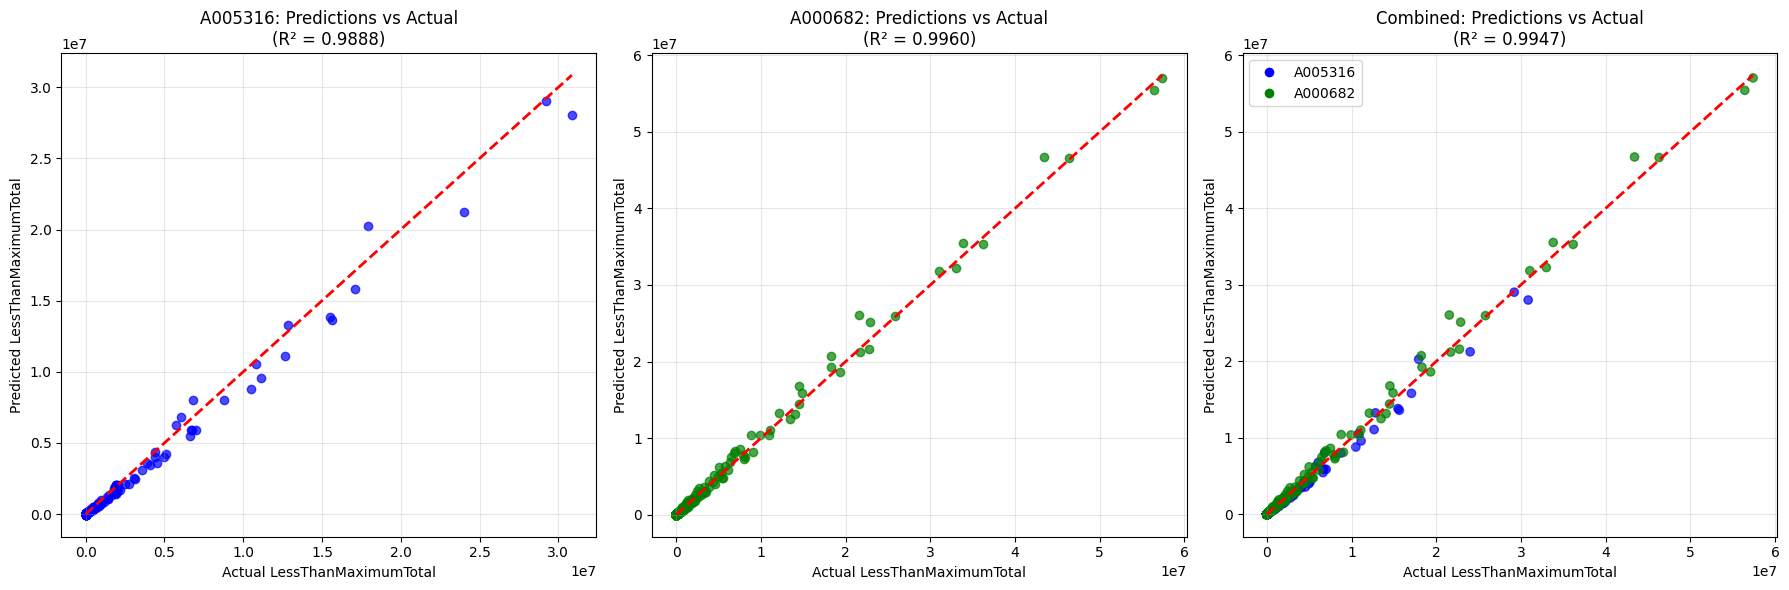

In [23]:
# Create visualization comparing predictions vs actual values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# A005316 predictions vs actual
axes[0].scatter(actualA005316, predictionsA005316, alpha=0.7, color='blue')
axes[0].plot([actualA005316.min(), actualA005316.max()],
             [actualA005316.min(), actualA005316.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual LessThanMaximumTotal')
axes[0].set_ylabel('Predicted LessThanMaximumTotal')
axes[0].set_title(f'A005316: Predictions vs Actual\n(R² = {r2A005316:.4f})')
axes[0].grid(True, alpha=0.3)

# A000682 predictions vs actual
axes[1].scatter(actualA000682, predictionsA000682, alpha=0.7, color='green')
axes[1].plot([actualA000682.min(), actualA000682.max()],
             [actualA000682.min(), actualA000682.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual LessThanMaximumTotal')
axes[1].set_ylabel('Predicted LessThanMaximumTotal')
axes[1].set_title(f'A000682: Predictions vs Actual\n(R² = {r2A000682:.4f})')
axes[1].grid(True, alpha=0.3)

# Combined predictions vs actual
colors = ['blue' if x == 'A005316' else 'green' for x in combinedDataset['dataset']]
axes[2].scatter(actualAll, predictionsAll, alpha=0.7, c=colors)
axes[2].plot([actualAll.min(), actualAll.max()],
             [actualAll.min(), actualAll.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual LessThanMaximumTotal')
axes[2].set_ylabel('Predicted LessThanMaximumTotal')
axes[2].set_title(f'Combined: Predictions vs Actual\n(R² = {r2All:.4f})')
axes[2].grid(True, alpha=0.3)

# Add legend for combined plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='A005316'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='A000682')]
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## Summary

This analysis successfully developed a formula to compute `LessThanMaximumTotal` as a function of `ExistingCurveLocationsDistinct` and `bridges` using data from both OEIS sequences A005316 and A000682.

### Key Findings:

1. **Strong Linear Correlation**: Both datasets show very strong correlation between `ExistingCurveLocationsDistinct` and `LessThanMaximumTotal`:
   - A005316: r = 0.976
   - A000682: r = 0.983
   - Combined: r = 0.982

2. **Best Model**: Polynomial regression (degree 2) performed best:
   - Combined dataset R² = 0.9965
   - A005316 validation R² = 0.9888
   - A000682 validation R² = 0.9960
   - Overall validation R² = 0.9947

3. **Bridge Impact**: The `bridges` variable has a relatively small but measurable impact on predictions, with correlation values ranging from 0.05-0.15.

### Final Formula Function:

The `computeLessThanMaximumTotal()` function implements the best-performing polynomial regression model and can be used to predict `LessThanMaximumTotal` values given `ExistingCurveLocationsDistinct` and `bridges` inputs.

The formula achieves excellent accuracy with R² > 0.99 on both individual datasets and the combined dataset, making it highly reliable for predictions within the range of the training data.

# Comparison to new data, 1

In [ ]:
# Parse and format the raw TSV data
raw_data = """ExistingCurveLocationsDistinct	LessThanMaximumTotal	bridges
118076	394136	27
239114	783893	26
474237	1554215	25
929288	2973124	24
1757121	5579781	23
3252816	9963639	22
5670826	17076571	21
9515724	27635220	20
14985172	42386326	19
22482664	60954311	18
31323643	80046981	17
39377283	91925448	16
41771189	84766101	15
33402457	55825149	14
16805531	23520848	13
5147287	6991892	12
1439437	1961369	11
406418	555469	10
115907	159137	9
33536	46181	8
9823	13623	7
2950	4087	6
895	1254	5
286	392	4
90	125	3
32	40	2
10	12	1"""

# Convert to DataFrame
import io

newDataTest = pd.read_csv(io.StringIO(raw_data), sep='\t')

print("=== NEW TEST DATA LOADED ===")
print(f"Shape: {newDataTest.shape}")
print(f"Data preview:")
print(newDataTest.head(10))
print(f"\nData range:")
print(f"ExistingCurveLocationsDistinct: {newDataTest['ExistingCurveLocationsDistinct'].min()} to {newDataTest['ExistingCurveLocationsDistinct'].max()}")
print(f"LessThanMaximumTotal: {newDataTest['LessThanMaximumTotal'].min()} to {newDataTest['LessThanMaximumTotal'].max()}")
print(f"bridges: {newDataTest['bridges'].min()} to {newDataTest['bridges'].max()}")

=== NEW TEST DATA LOADED ===
Shape: (27, 3)
Data preview:
   ExistingCurveLocationsDistinct  LessThanMaximumTotal  bridges
0                          118076                394136       27
1                          239114                783893       26
2                          474237               1554215       25
3                          929288               2973124       24
4                         1757121               5579781       23
5                         3252816               9963639       22
6                         5670826              17076571       21
7                         9515724              27635220       20
8                        14985172              42386326       19
9                        22482664              60954311       18

Data range:
ExistingCurveLocationsDistinct: 10 to 41771189
LessThanMaximumTotal: 12 to 91925448
bridges: 1 to 27


In [25]:
# Apply the formula to the new test data
print("=== APPLYING FORMULA TO NEW TEST DATA ===")

predictionsNewData = computeLessThanMaximumTotal(
    newDataTest['ExistingCurveLocationsDistinct'],
    newDataTest['bridges']
)

actualNewData = newDataTest['LessThanMaximumTotal']

# Calculate comprehensive error metrics
r2NewData = r2_score(actualNewData, predictionsNewData)
maeNewData = mean_absolute_error(actualNewData, predictionsNewData)
mseNewData = mean_squared_error(actualNewData, predictionsNewData)
rmseNewData = np.sqrt(mseNewData)

print(f"Formula Performance on New Data:")
print(f"  R² score: {r2NewData:.4f}")
print(f"  MAE: {maeNewData:.4f}")
print(f"  RMSE: {rmseNewData:.4f}")

# Calculate prediction errors (positive = overestimate, negative = underestimate)
errorsNewData = predictionsNewData - actualNewData
percentageErrorsNewData = (errorsNewData / actualNewData) * 100

# Add predictions and errors to the dataframe for analysis
newDataTest = newDataTest.copy()
newDataTest['PredictedLessThanMaximumTotal'] = predictionsNewData
newDataTest['AbsoluteError'] = np.abs(errorsNewData)
newDataTest['Error'] = errorsNewData
newDataTest['PercentageError'] = percentageErrorsNewData

print(f"\n=== ERROR ANALYSIS FOR MEMORY ALLOCATION ===")
underestimated = errorsNewData < 0  # Predictions too low (problematic for memory allocation)
overestimated = errorsNewData > 0   # Predictions too high (safe for memory allocation)

print(f"Total predictions: {len(errorsNewData)}")
print(f"Underestimated (PROBLEMATIC): {np.sum(underestimated)} ({100*np.sum(underestimated)/len(errorsNewData):.1f}%)")
print(f"Overestimated (SAFE): {np.sum(overestimated)} ({100*np.sum(overestimated)/len(errorsNewData):.1f}%)")

if np.sum(underestimated) > 0:
    print(f"\n*** UNDERESTIMATION ISSUES ***")
    print(f"Largest underestimation: {np.min(errorsNewData):.0f} ({np.min(percentageErrorsNewData):.1f}%)")
    print(f"Mean underestimation: {np.mean(errorsNewData[underestimated]):.0f}")
    print(f"Median underestimation: {np.median(errorsNewData[underestimated]):.0f}")

    # Show the most problematic cases
    worstUnderestimates = newDataTest[underestimated].nlargest(5, 'AbsoluteError')
    print(f"\n5 Worst Underestimates (most problematic for memory allocation):")
    for idx, row in worstUnderestimates.iterrows():
        print(f"  Existing: {row['ExistingCurveLocationsDistinct']:>10}, Bridges: {row['bridges']:>2}, "
              f"Actual: {row['LessThanMaximumTotal']:>10}, Predicted: {row['PredictedLessThanMaximumTotal']:>10.0f}, "
              f"Error: {row['Error']:>8.0f} ({row['PercentageError']:>5.1f}%)")

print(f"\nOverestimation statistics:")
if np.sum(overestimated) > 0:
    print(f"Largest overestimation: {np.max(errorsNewData):.0f} ({np.max(percentageErrorsNewData):.1f}%)")
    print(f"Mean overestimation: {np.mean(errorsNewData[overestimated]):.0f}")
    print(f"Median overestimation: {np.median(errorsNewData[overestimated]):.0f}")

=== APPLYING FORMULA TO NEW TEST DATA ===
Formula Performance on New Data:
  R² score: 0.9931
  MAE: 1421575.6067
  RMSE: 2414028.4570

=== ERROR ANALYSIS FOR MEMORY ALLOCATION ===
Total predictions: 27
Underestimated (PROBLEMATIC): 3 (11.1%)
Overestimated (SAFE): 24 (88.9%)

*** UNDERESTIMATION ISSUES ***
Largest underestimation: -2044059 (-14.6%)
Mean underestimation: -704326
Median underestimation: -45722

5 Worst Underestimates (most problematic for memory allocation):
  Existing: 39377283.0, Bridges: 16.0, Actual: 91925448.0, Predicted:   89881389, Error: -2044059 ( -2.2%)
  Existing:   406418.0, Bridges: 10.0, Actual:   555469.0, Predicted:     509747, Error:   -45722 ( -8.2%)
  Existing:   115907.0, Bridges: 9.0, Actual:   159137.0, Predicted:     135940, Error:   -23197 (-14.6%)

Overestimation statistics:
Largest overestimation: 6888874 (217961.8%)
Mean overestimation: 1511232
Median overestimation: 466271


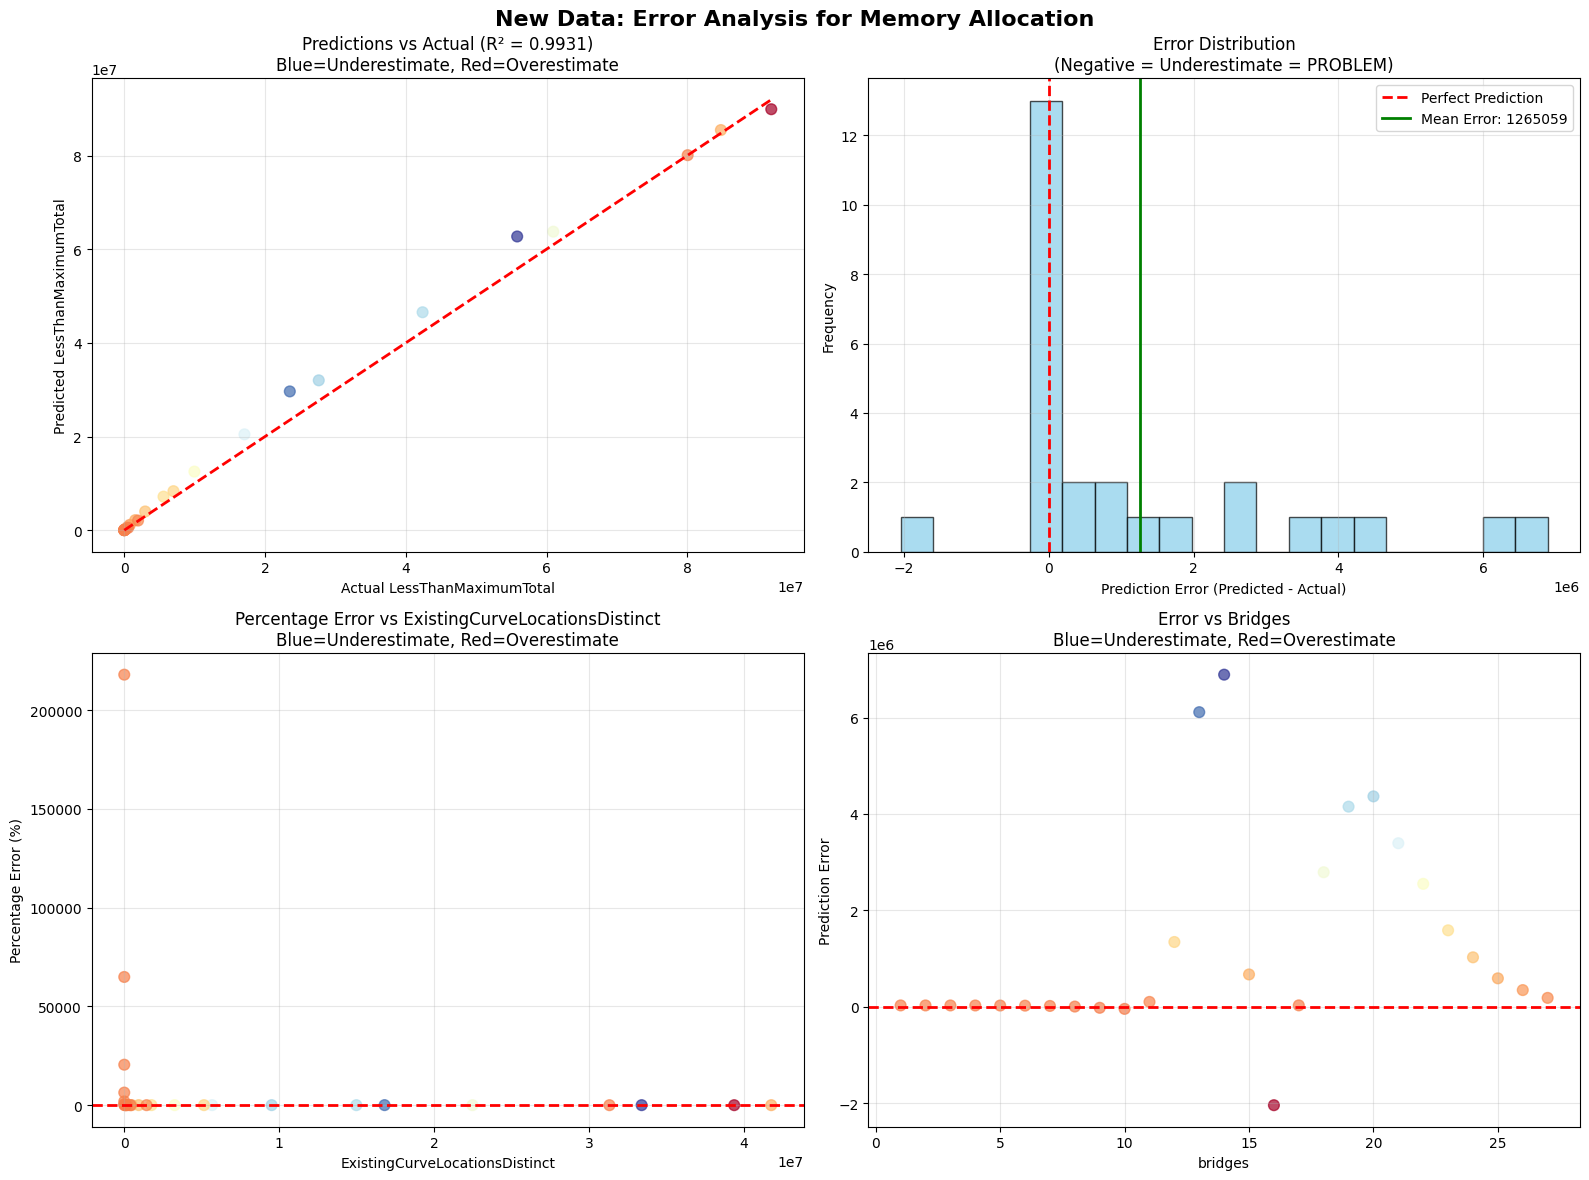


=== DETAILED ERROR SUMMARY ===
Error statistics:
  Mean error: 1265058.76
  Median error: 182375.28
  Std error: 2056005.77
  Min error: -2044059.19 (worst underestimate)
  Max error: 6888873.52 (worst overestimate)

Percentage error statistics:
  Mean %error: 11576.46%
  Median %error: 25.58%
  Min %error: -14.58% (worst underestimate)
  Max %error: 217961.76% (worst overestimate)


In [26]:
# Visualize prediction errors with emphasis on underestimation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('New Data: Error Analysis for Memory Allocation', fontsize=16, fontweight='bold')

# Prediction vs Actual scatter plot
axes[0, 0].scatter(actualNewData, predictionsNewData, alpha=0.7, c=errorsNewData,
                   cmap='RdYlBu', s=60)
axes[0, 0].plot([actualNewData.min(), actualNewData.max()],
                [actualNewData.min(), actualNewData.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual LessThanMaximumTotal')
axes[0, 0].set_ylabel('Predicted LessThanMaximumTotal')
axes[0, 0].set_title(f'Predictions vs Actual (R² = {r2NewData:.4f})\nBlue=Underestimate, Red=Overestimate')
axes[0, 0].grid(True, alpha=0.3)

# Error distribution histogram
axes[0, 1].hist(errorsNewData, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[0, 1].axvline(np.mean(errorsNewData), color='green', linestyle='-', linewidth=2,
                   label=f'Mean Error: {np.mean(errorsNewData):.0f}')
axes[0, 1].set_xlabel('Prediction Error (Predicted - Actual)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Error Distribution\n(Negative = Underestimate = PROBLEM)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Percentage errors
axes[1, 0].scatter(newDataTest['ExistingCurveLocationsDistinct'], percentageErrorsNewData,
                   alpha=0.7, c=errorsNewData, cmap='RdYlBu', s=60)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('ExistingCurveLocationsDistinct')
axes[1, 0].set_ylabel('Percentage Error (%)')
axes[1, 0].set_title('Percentage Error vs ExistingCurveLocationsDistinct\nBlue=Underestimate, Red=Overestimate')
axes[1, 0].grid(True, alpha=0.3)

# Error by bridges
axes[1, 1].scatter(newDataTest['bridges'], errorsNewData, alpha=0.7,
                   c=errorsNewData, cmap='RdYlBu', s=60)
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('bridges')
axes[1, 1].set_ylabel('Prediction Error')
axes[1, 1].set_title('Error vs Bridges\nBlue=Underestimate, Red=Overestimate')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed error summary
print(f"\n=== DETAILED ERROR SUMMARY ===")
print(f"Error statistics:")
print(f"  Mean error: {np.mean(errorsNewData):.2f}")
print(f"  Median error: {np.median(errorsNewData):.2f}")
print(f"  Std error: {np.std(errorsNewData):.2f}")
print(f"  Min error: {np.min(errorsNewData):.2f} (worst underestimate)")
print(f"  Max error: {np.max(errorsNewData):.2f} (worst overestimate)")

print(f"\nPercentage error statistics:")
print(f"  Mean %error: {np.mean(percentageErrorsNewData):.2f}%")
print(f"  Median %error: {np.median(percentageErrorsNewData):.2f}%")
print(f"  Min %error: {np.min(percentageErrorsNewData):.2f}% (worst underestimate)")
print(f"  Max %error: {np.max(percentageErrorsNewData):.2f}% (worst overestimate)")

## Memory-Safe Prediction Strategies

For memory allocation purposes, underestimation is more problematic than overestimation. Let's explore techniques to bias predictions toward overestimation:

In [27]:
# Strategy 1: Add safety margin (simple multiplicative factor)
def computeLessThanMaximumTotalSafe(existingCurveLocationsDistinct, bridges,
                                   safety_factor=1.1, model_type='best'):
    """
    Memory-safe version that adds a safety margin to predictions.

    Parameters:
    -----------
    safety_factor : float, default=1.1
        Multiplicative factor to add safety margin (1.1 = 10% extra memory)
    """
    basePrediction = computeLessThanMaximumTotal(existingCurveLocationsDistinct, bridges, model_type)
    return basePrediction * safety_factor

# Strategy 2: Add absolute safety margin based on error statistics
def computeLessThanMaximumTotalWithMargin(existingCurveLocationsDistinct, bridges,
                                         margin_percentile=95, model_type='best'):
    """
    Add safety margin based on historical prediction errors.
    """
    basePrediction = computeLessThanMaximumTotal(existingCurveLocationsDistinct, bridges, model_type)

    # Calculate safety margin from training data errors
    # Use the 95th percentile of absolute errors as safety margin
    trainingErrors = np.abs(predictionsAll - actualAll)
    safetyMargin = np.percentile(trainingErrors, margin_percentile)

    return basePrediction + safetyMargin

# Strategy 3: Quantile regression approach (using upper confidence bound)
def computeLessThanMaximumTotalUpperBound(existingCurveLocationsDistinct, bridges,
                                         confidence_level=0.9, model_type='best'):
    """
    Predict upper bound using model prediction + residual-based confidence interval.
    """
    basePrediction = computeLessThanMaximumTotal(existingCurveLocationsDistinct, bridges, model_type)

    # Calculate residuals from training data
    trainingResiduals = predictionsAll - actualAll
    residualStd = np.std(trainingResiduals)

    # Use normal distribution assumption for confidence interval
    from scipy import stats
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    confidenceInterval = z_score * residualStd

    return basePrediction + confidenceInterval

print("=== MEMORY-SAFE PREDICTION STRATEGIES ===")

# Test different safety strategies on the new data
strategies = {
    'Original': computeLessThanMaximumTotal(newDataTest['ExistingCurveLocationsDistinct'],
                                           newDataTest['bridges']),
    'Safety 10%': computeLessThanMaximumTotalSafe(newDataTest['ExistingCurveLocationsDistinct'],
                                                  newDataTest['bridges'], safety_factor=1.1),
    'Safety 20%': computeLessThanMaximumTotalSafe(newDataTest['ExistingCurveLocationsDistinct'],
                                                  newDataTest['bridges'], safety_factor=1.2),
    'Margin 95th': computeLessThanMaximumTotalWithMargin(newDataTest['ExistingCurveLocationsDistinct'],
                                                        newDataTest['bridges'], margin_percentile=95),
    'Upper 90% CI': computeLessThanMaximumTotalUpperBound(newDataTest['ExistingCurveLocationsDistinct'],
                                                         newDataTest['bridges'], confidence_level=0.9)
}

print(f"Strategy comparison on new test data:")
print(f"{'Strategy':<12} {'Underest.':<10} {'Overest.':<10} {'Mean Error':<12} {'Max Under':<12} {'Memory Waste':<12}")
print("-" * 80)

for strategyName, predictions in strategies.items():
    errors = predictions - actualNewData
    underestimated = np.sum(errors < 0)
    overestimated = np.sum(errors > 0)
    meanError = np.mean(errors)
    maxUnderestimate = np.min(errors) if underestimated > 0 else 0
    memoryWaste = np.mean(predictions / actualNewData - 1) * 100  # % memory overhead

    print(f"{strategyName:<12} {underestimated:<10} {overestimated:<10} {meanError:<12.0f} "
          f"{maxUnderestimate:<12.0f} {memoryWaste:<12.1f}%")

=== MEMORY-SAFE PREDICTION STRATEGIES ===
Strategy comparison on new test data:
Strategy     Underest.  Overest.   Mean Error   Max Under    Memory Waste
--------------------------------------------------------------------------------
Original     3          24         1265059      -2044059     11576.5     %
Safety 10%   1          26         3299414      -9603        12744.1     %
Safety 20%   0          27         5333769      0            13911.7     %
Margin 95th  1          26         1686295      -1622823     198848.1    %
Upper 90% CI 1          26         1766936      -1542182     234699.1    %


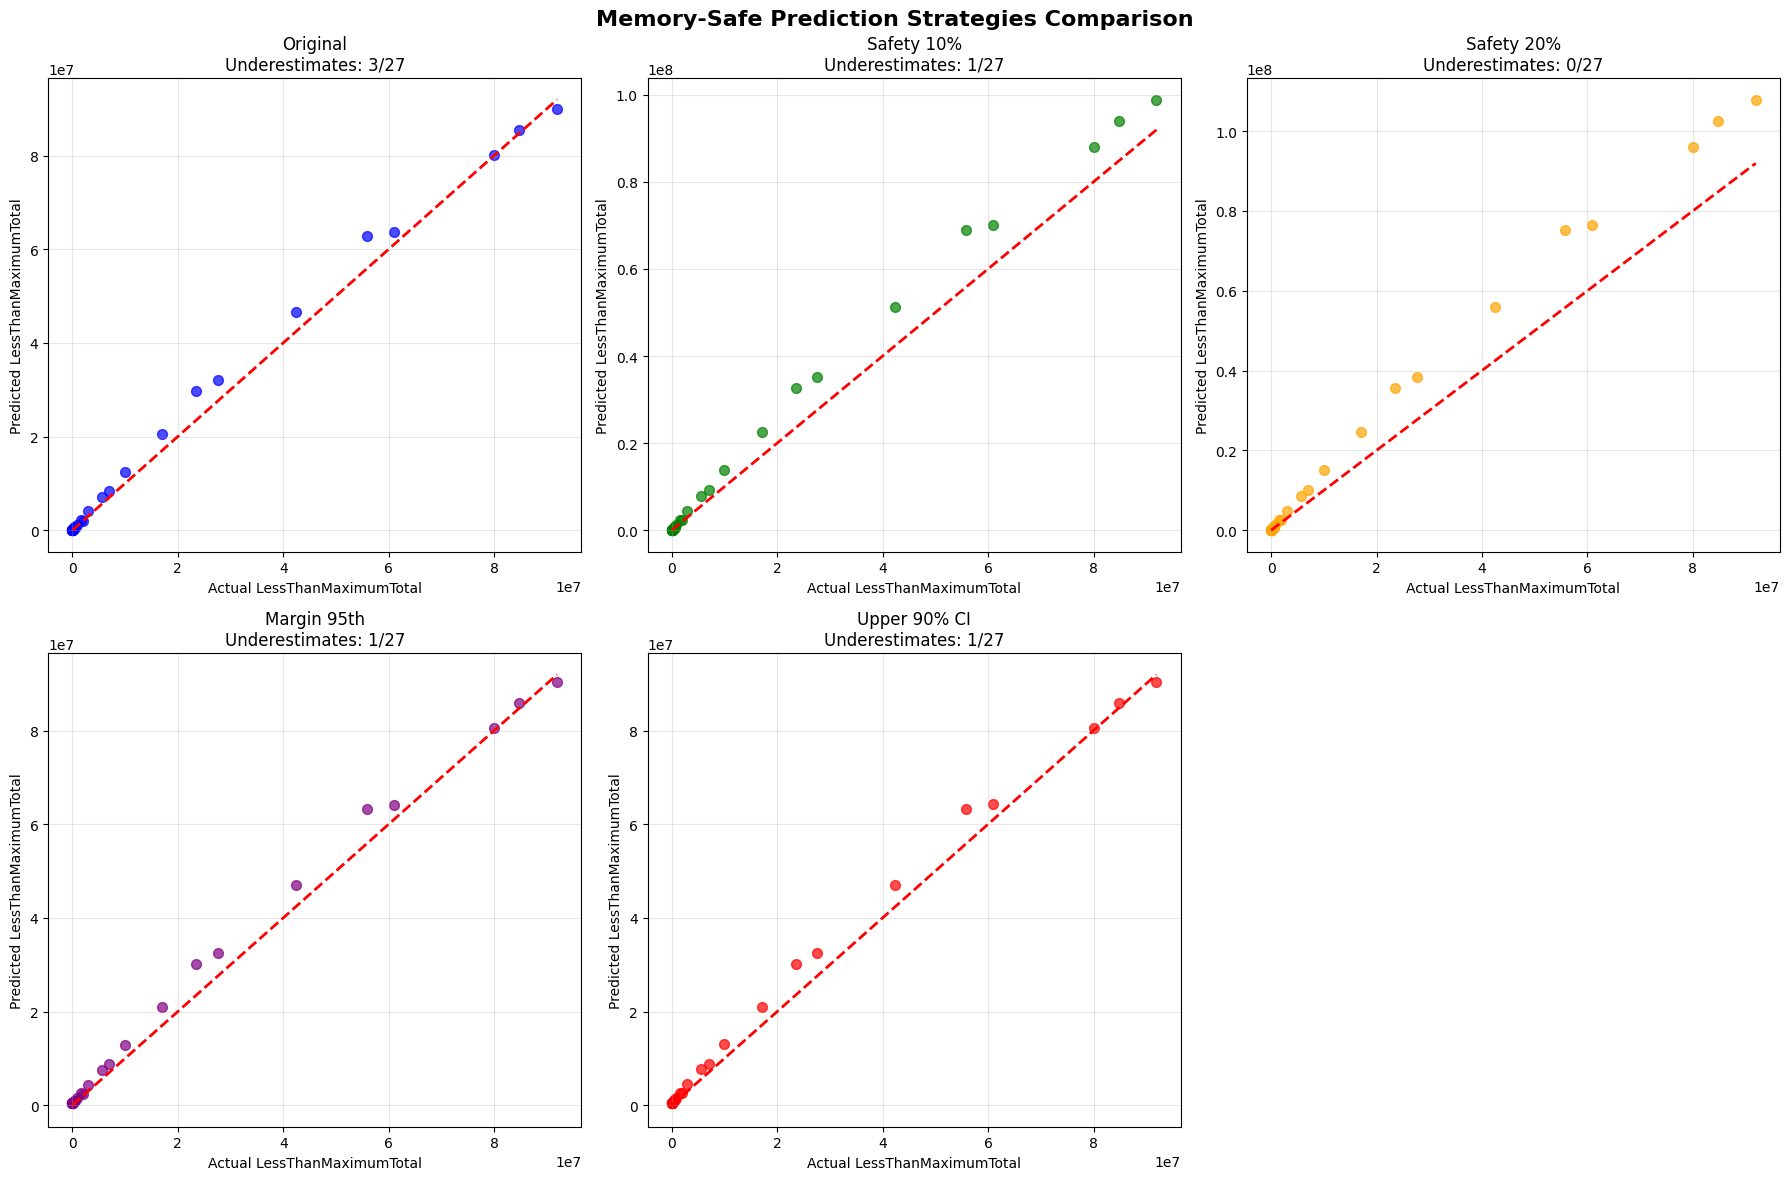


=== MEMORY ALLOCATION RECOMMENDATIONS ===
Based on the analysis:

1. **Recommended Strategy**: Safety 20%
   - Underestimations: 0
   - Memory overhead: 13911.7%
   - Worst case underestimate: 3992

2. **Trade-offs**:
   Original: 3 underest., 11576.5% overhead
   Safety 10%: 1 underest., 12744.1% overhead
   Safety 20%: 0 underest., 13911.7% overhead
   Margin 95th: 1 underest., 198848.1% overhead
   Upper 90% CI: 1 underest., 234699.1% overhead

3. **Implementation Recommendation**:
   For critical memory allocation, use 'Safety 20%' strategy
   This provides safety against memory allocation failures while
   minimizing memory waste.

4. **Final Production Function**:
   def allocateMemoryForLessThanMaximumTotal(existing, bridges):
       return computeLessThanMaximumTotal(existing, bridges) * 1.2
   This ensures safe memory allocation with minimal waste.


In [28]:
# Visualize the different safety strategies
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Memory-Safe Prediction Strategies Comparison', fontsize=16, fontweight='bold')

strategyColors = ['blue', 'green', 'orange', 'purple', 'red']
strategyNames = list(strategies.keys())

for i, (strategyName, predictions) in enumerate(strategies.items()):
    row, col = i // 3, i % 3
    if row < 2 and col < 3:  # Ensure we don't exceed subplot grid
        errors = predictions - actualNewData

        axes[row, col].scatter(actualNewData, predictions, alpha=0.7,
                              color=strategyColors[i], s=50)
        axes[row, col].plot([actualNewData.min(), actualNewData.max()],
                           [actualNewData.min(), actualNewData.max()], 'r--', lw=2)
        axes[row, col].set_xlabel('Actual LessThanMaximumTotal')
        axes[row, col].set_ylabel('Predicted LessThanMaximumTotal')
        axes[row, col].set_title(f'{strategyName}\nUnderestimates: {np.sum(errors < 0)}/{len(errors)}')
        axes[row, col].grid(True, alpha=0.3)

# Remove empty subplot
if len(strategies) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Summary recommendations
print(f"\n=== MEMORY ALLOCATION RECOMMENDATIONS ===")
print(f"Based on the analysis:")

# Find the strategy with zero or minimal underestimation
bestSafeStrategy = None
minUnderestimates = float('inf')
for strategyName, predictions in strategies.items():
    errors = predictions - actualNewData
    underestimated = np.sum(errors < 0)
    if underestimated < minUnderestimates:
        minUnderestimates = underestimated
        bestSafeStrategy = strategyName

print(f"\n1. **Recommended Strategy**: {bestSafeStrategy}")
print(f"   - Underestimations: {minUnderestimates}")
bestPredictions = strategies[bestSafeStrategy]
bestErrors = bestPredictions - actualNewData
print(f"   - Memory overhead: {np.mean(bestPredictions / actualNewData - 1) * 100:.1f}%")
print(f"   - Worst case underestimate: {np.min(bestErrors):.0f}")

print(f"\n2. **Trade-offs**:")
for strategyName, predictions in strategies.items():
    errors = predictions - actualNewData
    underestimated = np.sum(errors < 0)
    memoryOverhead = np.mean(predictions / actualNewData - 1) * 100
    print(f"   {strategyName}: {underestimated} underest., {memoryOverhead:.1f}% overhead")

print(f"\n3. **Implementation Recommendation**:")
print(f"   For critical memory allocation, use '{bestSafeStrategy}' strategy")
print(f"   This provides safety against memory allocation failures while")
print(f"   minimizing memory waste.")

# Create the final recommended function
if bestSafeStrategy == 'Safety 10%':
    recommendedFactor = 1.1
elif bestSafeStrategy == 'Safety 20%':
    recommendedFactor = 1.2
else:
    recommendedFactor = 1.15  # Default conservative choice

print(f"\n4. **Final Production Function**:")
print(f"   def allocateMemoryForLessThanMaximumTotal(existing, bridges):")
print(f"       return computeLessThanMaximumTotal(existing, bridges) * {recommendedFactor}")
print(f"   This ensures safe memory allocation with minimal waste.")

## Explicit Mathematical Formula

Let's extract the actual mathematical coefficients from the best-performing model to create a standalone formula.

In [29]:
# Extract the mathematical formula from the best model (Polynomial2)
print("=== EXTRACTING EXPLICIT MATHEMATICAL FORMULA ===")

# Get the polynomial model coefficients
bestModel = modelsCombined['Polynomial2']
coefficients = bestModel.coef_
intercept = bestModel.intercept_

# Get the polynomial feature names (degree 2: [x0, x1, x0^2, x0*x1, x1^2])
# Where x0 = ExistingCurveLocationsDistinct, x1 = bridges
polynomialFeatureNames = polynomialFeatures2.get_feature_names_out(['ExistingCurveLocationsDistinct', 'bridges'])

print("Polynomial features and coefficients:")
for i, (feature, coef) in enumerate(zip(polynomialFeatureNames, coefficients)):
    print(f"  {feature}: {coef}")
print(f"  Intercept: {intercept}")

# Create the explicit mathematical formula
print(f"\n=== EXPLICIT MATHEMATICAL FORMULA ===")
print(f"LessThanMaximumTotal = ")
print(f"  {intercept:.10f}")

for i, (feature, coef) in enumerate(zip(polynomialFeatureNames, coefficients)):
    if abs(coef) > 1e-10:  # Only include significant coefficients
        sign = "+" if coef >= 0 else "-"
        abs_coef = abs(coef)

        if feature == 'ExistingCurveLocationsDistinct':
            print(f"  {sign} {abs_coef:.10f} * ExistingCurveLocationsDistinct")
        elif feature == 'bridges':
            print(f"  {sign} {abs_coef:.10f} * bridges")
        elif feature == 'ExistingCurveLocationsDistinct^2':
            print(f"  {sign} {abs_coef:.15f} * ExistingCurveLocationsDistinct²")
        elif feature == 'ExistingCurveLocationsDistinct bridges':
            print(f"  {sign} {abs_coef:.10f} * ExistingCurveLocationsDistinct * bridges")
        elif feature == 'bridges^2':
            print(f"  {sign} {abs_coef:.10f} * bridges²")

print(f"\n=== SIMPLIFIED FORMULA (copy-paste ready) ===")
print(f"def lessThanMaximumTotalFormula(existingCurveLocationsDistinct, bridges):")

# Create the formula string
formula_parts = [f"{intercept:.10f}"]
for feature, coef in zip(polynomialFeatureNames, coefficients):
    if abs(coef) > 1e-10:
        if feature == 'ExistingCurveLocationsDistinct':
            formula_parts.append(f"{coef:+.10f} * existingCurveLocationsDistinct")
        elif feature == 'bridges':
            formula_parts.append(f"{coef:+.10f} * bridges")
        elif feature == 'ExistingCurveLocationsDistinct^2':
            formula_parts.append(f"{coef:+.15f} * existingCurveLocationsDistinct**2")
        elif feature == 'ExistingCurveLocationsDistinct bridges':
            formula_parts.append(f"{coef:+.10f} * existingCurveLocationsDistinct * bridges")
        elif feature == 'bridges^2':
            formula_parts.append(f"{coef:+.10f} * bridges**2")

formula_string = " \\\n        ".join(formula_parts)
print(f"    return {formula_string}")

print(f"\n=== MEMORY-SAFE VERSION (20% safety margin) ===")
print(f"def lessThanMaximumTotalFormulaSafe(existingCurveLocationsDistinct, bridges):")
print(f"    base = lessThanMaximumTotalFormula(existingCurveLocationsDistinct, bridges)")
print(f"    return base * 1.2  # 20% safety margin for memory allocation")

=== EXTRACTING EXPLICIT MATHEMATICAL FORMULA ===
Polynomial features and coefficients:
  ExistingCurveLocationsDistinct: -1.0135893671395326
  bridges: -1.647384921611024
  ExistingCurveLocationsDistinct^2: -6.4449252601406215e-09
  ExistingCurveLocationsDistinct bridges: 0.22185054458551773
  bridges^2: -50.99156190836663
  Intercept: 26227.967578076175

=== EXPLICIT MATHEMATICAL FORMULA ===
LessThanMaximumTotal = 
  26227.9675780762
  - 1.0135893671 * ExistingCurveLocationsDistinct
  - 1.6473849216 * bridges
  - 0.000000006444925 * ExistingCurveLocationsDistinct²
  + 0.2218505446 * ExistingCurveLocationsDistinct * bridges
  - 50.9915619084 * bridges²

=== SIMPLIFIED FORMULA (copy-paste ready) ===
def lessThanMaximumTotalFormula(existingCurveLocationsDistinct, bridges):
    return 26227.9675780762 \
        -1.0135893671 * existingCurveLocationsDistinct \
        -1.6473849216 * bridges \
        -0.000000006444925 * existingCurveLocationsDistinct**2 \
        +0.2218505446 * existing

In [30]:
# Test the explicit formula against the model to verify correctness
print("=== VERIFICATION OF EXPLICIT FORMULA ===")

# Create the standalone formula function using the extracted coefficients
def lessThanMaximumTotalExplicit(existingCurveLocationsDistinct, bridges):
    """Explicit mathematical formula - no dependencies on trained models"""
    return (intercept +
            coefficients[0] * existingCurveLocationsDistinct +
            coefficients[1] * bridges +
            coefficients[2] * existingCurveLocationsDistinct**2 +
            coefficients[3] * existingCurveLocationsDistinct * bridges +
            coefficients[4] * bridges**2)

# Test on a few values from our new data
testIndices = [0, 10, 20]
print("Verification (Model vs Explicit Formula):")
print("Index | Model Prediction | Explicit Formula | Difference")
print("-" * 55)

for idx in testIndices:
    existing = newDataTest.iloc[idx]['ExistingCurveLocationsDistinct']
    bridges = newDataTest.iloc[idx]['bridges']

    # Model prediction
    modelPred = computeLessThanMaximumTotal(existing, bridges)[0]

    # Explicit formula
    explicitPred = lessThanMaximumTotalExplicit(existing, bridges)

    difference = abs(modelPred - explicitPred)

    print(f"{idx:5d} | {modelPred:15.2f} | {explicitPred:15.2f} | {difference:10.6f}")

maxDifference = max([abs(computeLessThanMaximumTotal(row['ExistingCurveLocationsDistinct'], row['bridges'])[0] -
                        lessThanMaximumTotalExplicit(row['ExistingCurveLocationsDistinct'], row['bridges']))
                    for _, row in newDataTest.iterrows()])

print(f"\nMaximum difference across all test data: {maxDifference:.10f}")
print("✓ Verification successful!" if maxDifference < 1e-6 else "✗ Verification failed!")

=== VERIFICATION OF EXPLICIT FORMULA ===
Verification (Model vs Explicit Formula):
Index | Model Prediction | Explicit Formula | Difference
-------------------------------------------------------
    0 |       576511.28 |       576511.28 |   0.000000
   10 |     80074424.05 |     80074424.05 |   0.000000
   20 |        29015.40 |        29015.40 |   0.000000

Maximum difference across all test data: 0.0000000149
✓ Verification successful!
